##### Establishing a connection between Python and your PostgreSQL database:

In [1]:
import psycopg2
import pandas as pd

# Connectong to my PostgreSQL database
conn = psycopg2.connect(
    database="Orchid_Data_Final",
    user="postgres",
    password="yashu",
    host="localhost",
    port="5432"
)

# Creating a cursor object
cur = conn.cursor()

In [2]:
# Executing a SQL query
cur.execute("SELECT * FROM abg_events")

# Fetching all rows from the result
data = cur.fetchall()

# Converting the data to a pandas DataFrame
df_abgevents = pd.DataFrame(data, columns=[desc[0] for desc in cur.description])
#df_abgevents

In [3]:
#just to check the tables in the database which we have provided
cur.execute("SELECT table_name FROM information_schema.tables WHERE table_schema='public'")
tables = [table[0] for table in cur.fetchall()]


In [4]:
# Executing a SQL query
cur.execute("SELECT * FROM calc_deaths")

# Fetching all rows from the result
data = cur.fetchall()

# Converting the data to a pandas DataFrame
df_calcdeaths = pd.DataFrame(data, columns=[desc[0] for desc in cur.description])
#df_calcdeaths
#df_calcdeaths.info()

In [5]:
# Executing a SQL query
cur.execute("SELECT * FROM cbc_events")

# Fetching all rows from the result
data = cur.fetchall()

# Converting the data to a pandas DataFrame
df_cbc_events = pd.DataFrame(data, columns=[desc[0] for desc in cur.description])
#df_cbc_events.describe()
#df_cbc_events.shape
df_cbc_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464301 entries, 0 to 1464300
Data columns (total 4 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   patient_id      1464301 non-null  object        
 1   cbc_time_event  1463750 non-null  datetime64[ns]
 2   cbc_name        1464301 non-null  object        
 3   cbc_value       1464297 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 44.7+ MB


In [6]:
# Executing a SQL query
cur.execute("SELECT * FROM culture_events")

# Fetching all rows from the result
data = cur.fetchall()

# Converting the data to a pandas DataFrame
df_culture_events = pd.DataFrame(data, columns=[desc[0] for desc in cur.description])
#df_culture_events.describe()
df_culture_events.shape
#df_culture_events.info()

(69520, 4)

In [7]:
# Executing a SQL query
cur.execute("SELECT * FROM serology_events")

# Fetching all rows from the result
data = cur.fetchall()

# Converting the data to a pandas DataFrame
df_serology_events = pd.DataFrame(data, columns=[desc[0] for desc in cur.description])
#df_serology_events.describe()
#df_serology_events.shape
df_serology_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295718 entries, 0 to 295717
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   patient_id          295718 non-null  object        
 1   time_event          295271 non-null  datetime64[ns]
 2   result              295718 non-null  object        
 3   serology_name_copy  295718 non-null  object        
 4   serology_category   145424 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 11.3+ MB


In [8]:
# Executing a SQL query
cur.execute("SELECT * FROM referrals")

# Fetching all rows from the result
data = cur.fetchall()

# Converting the data to a pandas DataFrame
df_referrals = pd.DataFrame(data, columns=[desc[0] for desc in cur.description])
#df_referrals.describe()
df_referrals.shape
#df_referrals.info()

(133101, 34)

In [9]:
# Executing a SQL query
cur.execute("SELECT * FROM  chemistry_events")

# Fetching all rows from the result
data = cur.fetchall()

# Converting the data to a pandas DataFrame
df_chemistry_events = pd.DataFrame(data, columns=[desc[0] for desc in cur.description])
#df_chemistry_events.describe()
df_chemistry_events.shape
#df_chemistry_events.info()

(4133679, 5)

In [10]:
# Executing a SQL query
cur.execute("SELECT * FROM  fluid_balance_events")

# Fetching all rows from the result
data = cur.fetchall()

# Converting the data to a pandas DataFrame
df_fluid_balance_events = pd.DataFrame(data, columns=[desc[0] for desc in cur.description])
#df_fluid_balance_events.describe()
df_fluid_balance_events.shape
#df_fluid_balance_events.info()

(128164, 6)

In [11]:
# Executing a SQL query
cur.execute("SELECT * FROM hemo_events")

# Fetching all rows from the result
data = cur.fetchall()

# Converting the data to a pandas DataFrame
df_hemo_events = pd.DataFrame(data, columns=[desc[0] for desc in cur.description])
#df_hemo_events.describe()
df_hemo_events.shape
#df_hemo_events.info()

(1588252, 6)

In [12]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter('ignore', category=FutureWarning)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
!pip install plotly 
import plotly.io as pio
pio.renderers.default = "notebook"
pd.core.frame.DataFrame

Defaulting to user installation because normal site-packages is not writeable


pandas.core.frame.DataFrame

##### Distribution of Patients by Ethnicity

race
White              79688
Black              25180
Hispanic           20728
Other / Unknown     7505
Name: count, dtype: int64


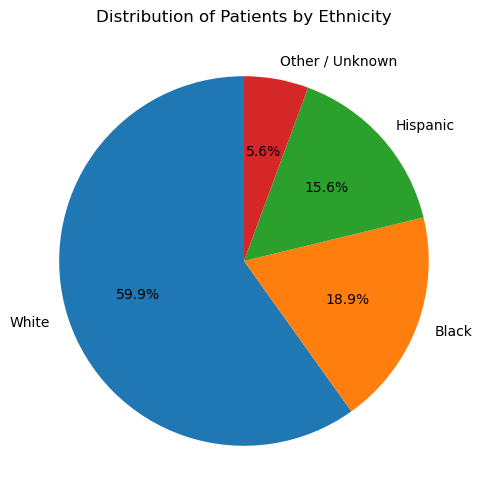

In [13]:
race_counts = df_referrals['race'].value_counts()
print(race_counts)
# Plot the pie chart
plt.figure(figsize=(6,6))
plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Patients by Ethnicity')
plt.show()

## Transplanted Patients by Year and Age Group'

age_group      0-20  21-40  41-60  61-80  81+
referral_year                                
2015            157    321    362    134    0
2016            135    385    381    113    0
2017            135    430    403    131    1
2018            131    507    466    165    3
2019            163    554    636    201    2
2020            154    604    614    156    1
2021            151    606    584    174    2


<Figure size 1000x800 with 0 Axes>

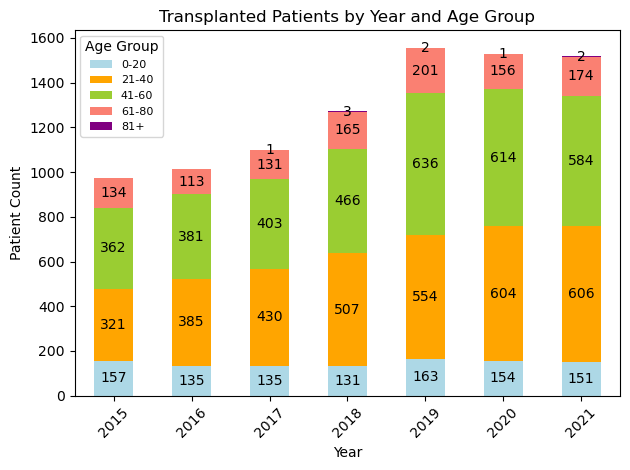

In [14]:
# Define age categories
bins = [0, 20, 40, 60, 80, 100]  # Define your age bins
labels = ['0-20', '21-40', '41-60', '61-80', '81+']  # Age group labels

# Create a new column for age categories
df_referrals['age_group'] = pd.cut(df_referrals['age'], bins=bins, labels=labels, right=False)

# Filter the DataFrame for transplanted patients
transplanted_true = df_referrals[(df_referrals['transplanted'] == 'TRUE') & 
                                  (df_referrals['approached'] == 'TRUE') & 
                                  (df_referrals['authorized'] == 'TRUE')]

# Count the number of patients by year and age group
transplanted_true_counts = transplanted_true.groupby(['referral_year', 'age_group']).size().unstack(fill_value=0)

print(transplanted_true_counts )
plt.figure(figsize=(10, 8))

bars = transplanted_true_counts.plot(kind='bar', stacked=True, color=['lightblue', 'orange', 'yellowgreen', 'salmon', 'purple'],)

# Annotate each bar with its value
for index, value in enumerate(transplanted_true_counts.values):
    for i, count in enumerate(value):
        if count > 0:  # Only annotate if the count is greater than 0
            plt.text(index, sum(value[:i]) + count / 2, count, ha='center', va='center', fontsize=10, color='black')

plt.xlabel('Year')
plt.ylabel('Patient Count')
plt.title('Transplanted Patients by Year and Age Group')
plt.legend(title='Age Group',loc='best', fontsize=8)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

## CBC EVENTS

## CBC_events table charts

### 'Hourly Distribution of CBC Tests by CBC Name'

<Figure size 1400x700 with 0 Axes>

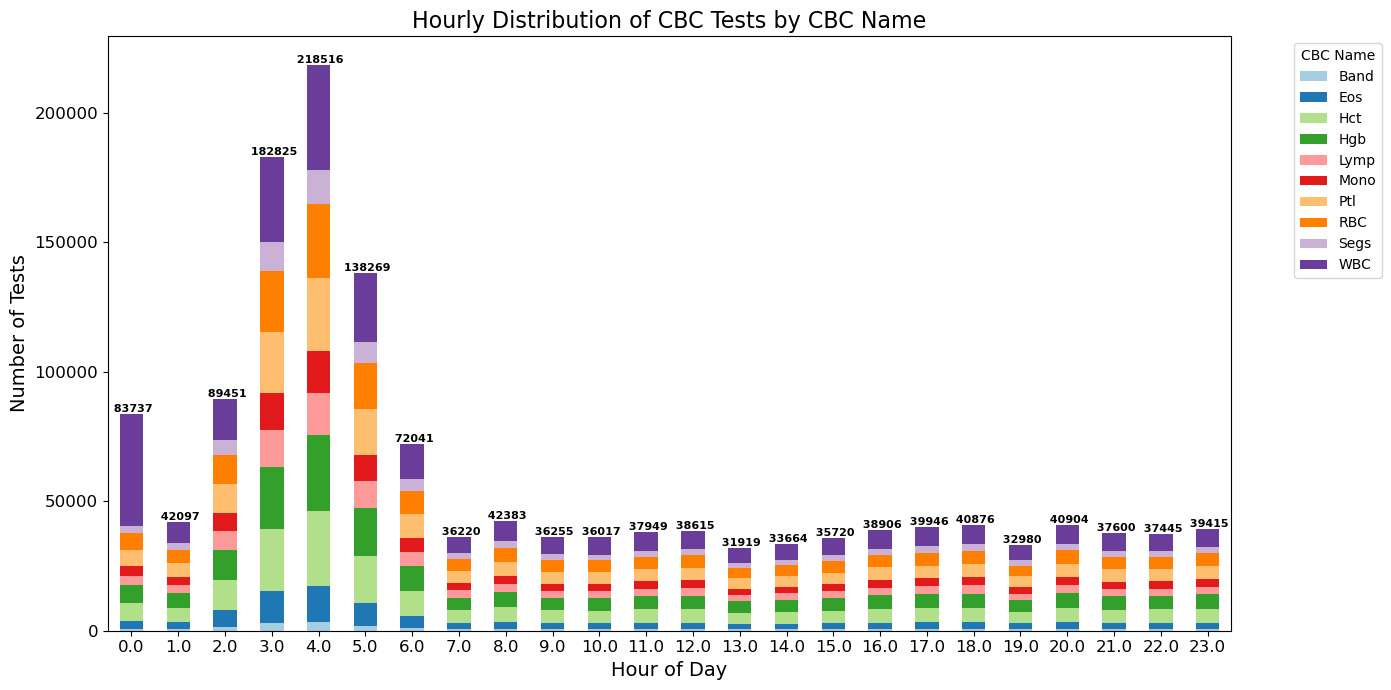

In [15]:
# Ensure the 'cbc_time_event' column is in datetime format
df_cbc_events['cbc_time_event'] = pd.to_datetime(df_cbc_events['cbc_time_event'])

# Extract hour, day, and month from the 'cbc_time_event' column
df_cbc_events['hour'] = df_cbc_events['cbc_time_event'].dt.hour
df_cbc_events['day'] = df_cbc_events['cbc_time_event'].dt.day_name()
df_cbc_events['month'] = df_cbc_events['cbc_time_event'].dt.month_name()

# Group by 'hour' and 'cbc_name' to get the hourly distribution for each CBC test
hourly_distribution_by_name = df_cbc_events.groupby(['hour', 'cbc_name']).size().unstack(fill_value=0)

# Plot the stacked bar chart
plt.figure(figsize=(14, 7))
ax = hourly_distribution_by_name.plot(kind='bar', stacked=True, figsize=(14, 7), color=plt.cm.Paired.colors)

# Add title and labels
plt.title('Hourly Distribution of CBC Tests by CBC Name', fontsize=16)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Number of Tests', fontsize=14)
plt.xticks(rotation=0, fontsize=12)  # Keep x-axis labels horizontal
plt.yticks(fontsize=12)

# Calculate total patients for each hour and display it on top of each bar
totals = hourly_distribution_by_name.sum(axis=1)

# Add total labels on top of the bars
for i, total in enumerate(totals):
    ax.text(i, total + 1, f' {int(total)}', ha='center', va='bottom', fontsize=8, fontweight='bold')

# Improve the legend
plt.legend(title='CBC Name', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to fit everything
plt.tight_layout()

# Show the plot
plt.show()

### 'Percentage of Transplants by CBC Name'

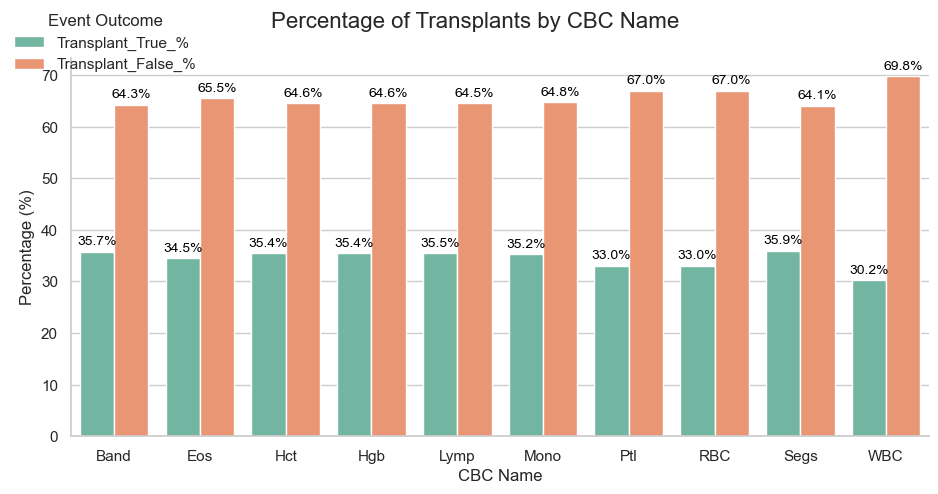

In [16]:
merged_ref_cbc_df = pd.merge(df_cbc_events, df_referrals, on='patient_id', how='inner')

# Group by cbc name and transplant status, calculate counts
cbc_transplant_group = merged_ref_cbc_df.groupby(['cbc_name', 'transplanted']).size().unstack(fill_value=0)


# Calculate the percentage of successful and unsuccessful events
cbc_transplant_group['Total'] = cbc_transplant_group['TRUE'] + cbc_transplant_group['FALSE']
cbc_transplant_group['Transplant_True_%'] = (cbc_transplant_group['TRUE'] / cbc_transplant_group['Total']) * 100
cbc_transplant_group['Transplant_False_%'] = (cbc_transplant_group['FALSE'] / cbc_transplant_group['Total']) * 100

# Melt the dataframe for easier plotting with seaborn
cbc_transplant_group_melted = cbc_transplant_group[['Transplant_True_%', 'Transplant_False_%']].reset_index().melt(id_vars='cbc_name', 
                                var_name='Transplanted_Status', value_name='Percentage')

# Create the categorical plot using percentages
sns.set(style="whitegrid")
g = sns.catplot(
    x="cbc_name", 
    y="Percentage", 
    hue="Transplanted_Status", 
    data=cbc_transplant_group_melted, 
    kind="bar", 
    palette="Set2", 
    height=5, 
    aspect=1.5,
    legend=False  # Disable default legend
)

# Modify the labels
g.set_axis_labels("CBC Name", "Percentage (%)")
g.fig.suptitle('Percentage of Transplants by CBC Name', fontsize=16)
g.add_legend(title="Event Outcome", loc='upper left')

# Step 4: Add percentage labels on the bars
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height():.1f}%', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='baseline', 
                 color='black', 
                 fontsize=10, 
                 xytext=(0, 5),  # Offset the text a bit above the bar
                 textcoords='offset points')

# Show plot
plt.tight_layout()
plt.show()

### 'CBC Test Distribution and Average Tests per Patient'

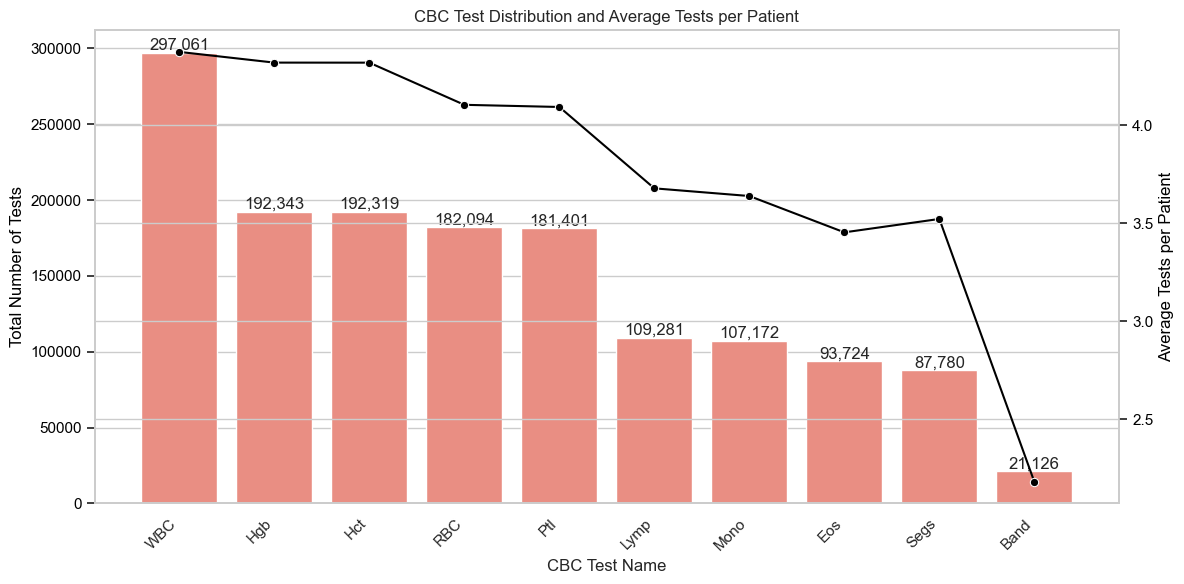

  cbc_name  total_tests  unique_patients  avg_tests_per_patient
0      WBC       297061            67930               4.373046
1      Hgb       192343            44539               4.318530
2      Hct       192319            44536               4.318282
3      RBC       182094            44376               4.103434
4      Ptl       181401            44326               4.092429
5     Lymp       109281            29714               3.677761
6     Mono       107172            29454               3.638623
7      Eos        93724            27139               3.453480
8     Segs        87780            24925               3.521765
9     Band        21126             9683               2.181762


In [17]:
# Count the CBC tests
cbc_counts = df_cbc_events['cbc_name'].value_counts().reset_index()
cbc_counts.columns = ['cbc_name', 'total_tests']
# Get the number of unique patients for each CBC test
cbc_patients = df_cbc_events.groupby('cbc_name')['patient_id'].nunique().reset_index()
cbc_patients.columns = ['cbc_name', 'unique_patients']
# Merge the counts
cbc_data = pd.merge (cbc_counts,cbc_patients, on='cbc_name')
# Calculate the average tests per patient
cbc_data['avg_tests_per_patient'] = cbc_data['total_tests'] / cbc_data['unique_patients']
# Sort by total tests
cbc_data = cbc_data.sort_values('total_tests', ascending=False)
# Create the visualization
fig, ax1 = plt.subplots(figsize=(12, 6))
# Bar plot for total tests
sns.barplot(x='cbc_name', y='total_tests', data=cbc_data, ax=ax1, color='salmon')
ax1.set_xlabel('CBC Test Name')
ax1.set_ylabel('Total Number of Tests', color='black')
ax1.tick_params(axis='y', labelcolor='black')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
# Create a second y-axis for average tests per patient
ax2 = ax1.twinx()
sns.lineplot(x='cbc_name', y='avg_tests_per_patient', data=cbc_data, ax=ax2, color='black', marker='o')
ax2.set_ylabel('Average Tests per Patient', color='black')
ax2.tick_params(axis='y', labelcolor='black')
# Add value labels on the bars
for i, v in enumerate(cbc_data['total_tests']):
    ax1.text(i, v, f'{v:,}', ha='center', va='bottom')
plt.title('CBC Test Distribution and Average Tests per Patient')
plt.tight_layout()
plt.show()
# Print summary statistics
print(cbc_data)


## Culture_events table charts

### 'Hourly Distribution of Culture Test by Culture Source'

<Figure size 1400x700 with 0 Axes>

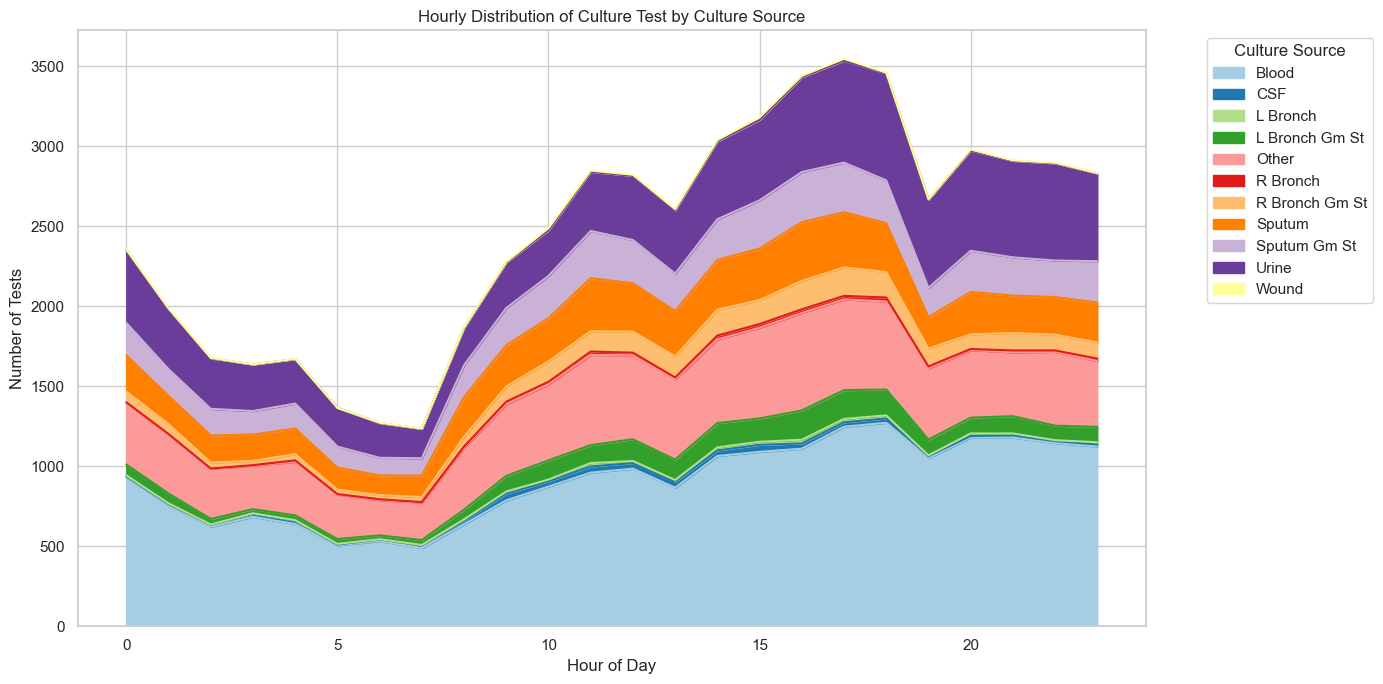

In [18]:
# Ensure the 'culture_time_event' column is in datetime format
df_culture_events['culture_time_event'] = pd.to_datetime(df_culture_events['culture_time_event'])

# Extract hour, day, and month from the 'culture_time_event' column
df_culture_events['hour'] = df_culture_events['culture_time_event'].dt.hour
df_culture_events['day'] = df_culture_events['culture_time_event'].dt.day_name()
df_culture_events['month'] = df_culture_events['culture_time_event'].dt.month_name()

# Group by 'hour' and 'culture_source' to get the hourly distribution for each Culture test
hourly_distribution_by_name = df_culture_events.groupby(['hour', 'culture_source']).size().unstack(fill_value=0)

# Plot the stacked bar chart
plt.figure(figsize=(14, 7))
area_chart = hourly_distribution_by_name.plot(kind='area', stacked=True, figsize=(14, 7), color=plt.cm.Paired.colors)

# Add title and labels
plt.title('Hourly Distribution of Culture Test by Culture Source')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Tests')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(title='Culture Source', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

# Show the plot
plt.show()


### Percentage of Transplants by Culture Result

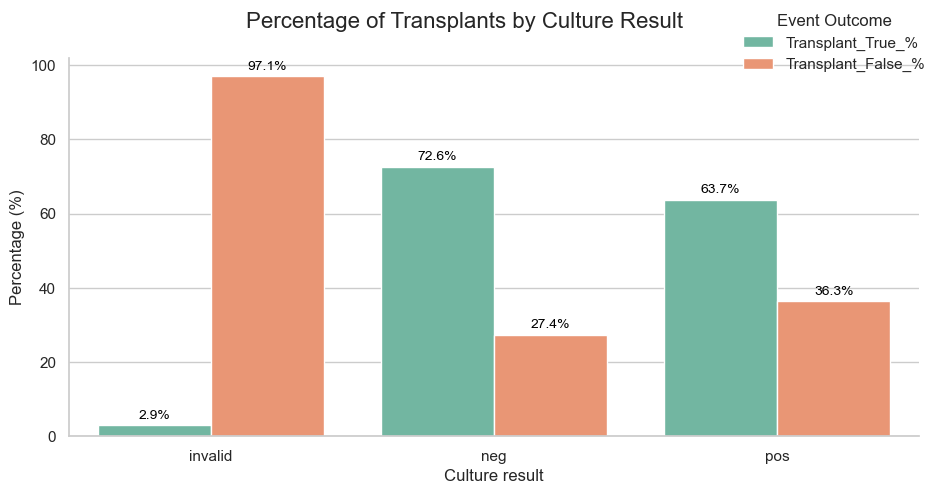

In [19]:
merged_ref_culture_df = pd.merge(df_culture_events, df_referrals, on='patient_id', how='inner')

# Group by fluid type and transplant status, calculate counts
culture_transplant_group = merged_ref_culture_df.groupby(['culture_result', 'transplanted']).size().unstack(fill_value=0)


# Calculate the percentage of successful and unsuccessful events
culture_transplant_group['Total'] =culture_transplant_group['TRUE'] + culture_transplant_group['FALSE']
culture_transplant_group['Transplant_True_%'] = (culture_transplant_group['TRUE'] / culture_transplant_group['Total']) * 100
culture_transplant_group['Transplant_False_%'] = (culture_transplant_group['FALSE'] / culture_transplant_group['Total']) * 100

# Melt the dataframe for easier plotting with seaborn
culture_transplant_group_melted = culture_transplant_group[['Transplant_True_%', 'Transplant_False_%']].reset_index().melt(id_vars='culture_result', 
                                var_name='Transplanted_Status', value_name='Percentage')

# Create the categorical plot using percentages
sns.set(style="whitegrid")
g = sns.catplot(
    x="culture_result", 
    y="Percentage", 
    hue="Transplanted_Status", 
    data=culture_transplant_group_melted , 
    kind="bar", 
    palette="Set2", 
    height=5, 
    aspect=1.5,
    legend=False  # Disable default legend
)

# Modify the labels
g.set_axis_labels("Culture result", "Percentage (%)")
g.fig.suptitle('Percentage of Transplants by Culture Result', fontsize=16)
g.add_legend(title="Event Outcome", loc='upper right')

# Step 4: Add percentage labels on the bars
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height():.1f}%', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='baseline', 
                 color='black', 
                 fontsize=10, 
                 xytext=(0, 5),  # Offset the text a bit above the bar
                 textcoords='offset points')

# Show plot
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Distribution of Culture Results by Gender

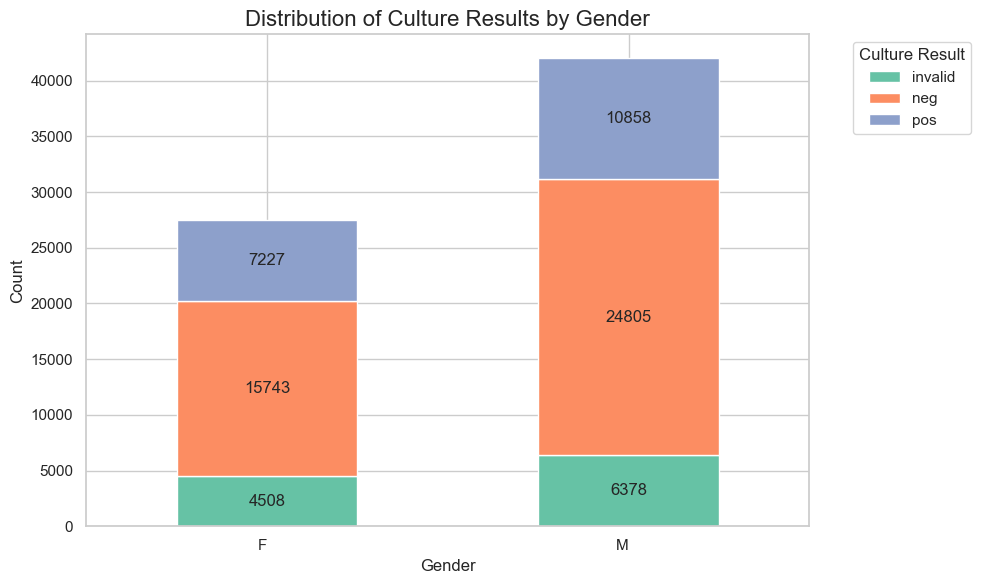

In [20]:
merged_df = pd.merge(df_culture_events, df_referrals[['patient_id', 'gender']], on='patient_id')

# Group by 'gender' and 'culture_result' to count occurrences
culture_counts = merged_df.groupby(['gender', 'culture_result']).size()

# Unstack the result column to create separate columns for each culture result
culture_counts_unstacked = culture_counts.unstack()

# Set a more distinct color palette for the stacked bars
colors = sns.color_palette("Set2")

# Plot the stacked bar chart
ax = culture_counts_unstacked.plot(kind='bar', stacked=True, figsize=(10,6), color=colors)

# Improve the layout and appearance
plt.title('Distribution of Culture Results by Gender', fontsize=16)
plt.xlabel( 'Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0, ha='right')
# Update the legend to make the result categories clearer
plt.legend(title='Culture Result', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add value annotations to the bars for clarity
for container in ax.containers:
    ax.bar_label(container, label_type='center')

# Tighten layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()

## ABG_EVENTS

### Pattern analysis in ABG test frequency before and after brain death declaration 

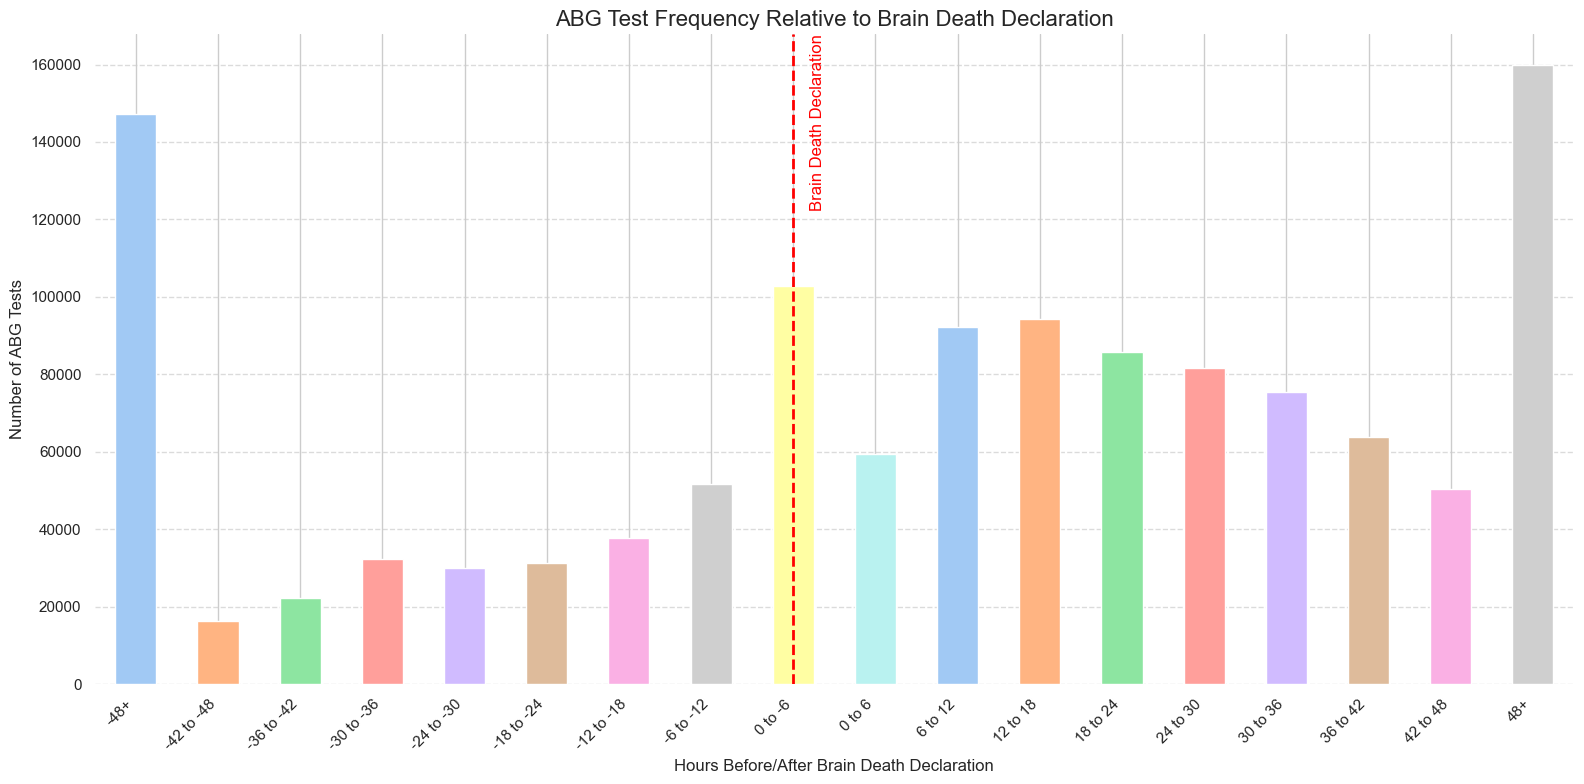

In [21]:
# Merge the dataframes on patient_id
merged_df = pd.merge(df_abgevents, df_referrals[['patient_id', 'time_brain_death']], on='patient_id', how='left')

# Calculate time difference between ABG test and brain death declaration
merged_df['time_diff'] = (merged_df['abg_time_event'] - merged_df['time_brain_death']).dt.total_seconds() / 3600  # in hours

# Group the data into bins (e.g., 6-hour intervals)
bins = [-float('inf'), -48, -42, -36, -30, -24, -18, -12, -6, 0, 6, 12, 18, 24, 30, 36, 42, 48, float('inf')]
labels = ['-48+', '-42 to -48', '-36 to -42', '-30 to -36', '-24 to -30', '-18 to -24', '-12 to -18', '-6 to -12', '0 to -6', 
          '0 to 6', '6 to 12', '12 to 18', '18 to 24', '24 to 30', '30 to 36', '36 to 42', '42 to 48', '48+']
merged_df['time_group'] = pd.cut(merged_df['time_diff'], bins=bins, labels=labels, include_lowest=True)

# Count the number of ABG tests in each time group
abg_counts = merged_df['time_group'].value_counts().sort_index()

# Create a pastel color palette
pastel_colors = sns.color_palette("pastel")

# Plotting
plt.figure(figsize=(16, 8))
abg_counts.plot(kind='bar', color=pastel_colors)
plt.title('ABG Test Frequency Relative to Brain Death Declaration', fontsize=16)
plt.xlabel('Hours Before/After Brain Death Declaration', fontsize=12)
plt.ylabel('Number of ABG Tests', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Enhance the overall look
plt.tight_layout()
sns.despine(left=True, bottom=True)

# Add a vertical line at x=0 to represent the brain death declaration time
plt.axvline(x=8, color='red', linestyle='--', linewidth=2)
plt.text(8.2, plt.ylim()[1], 'Brain Death Declaration', rotation=90, va='top', color='red')

plt.show()

### Patient count distribution by ABG name

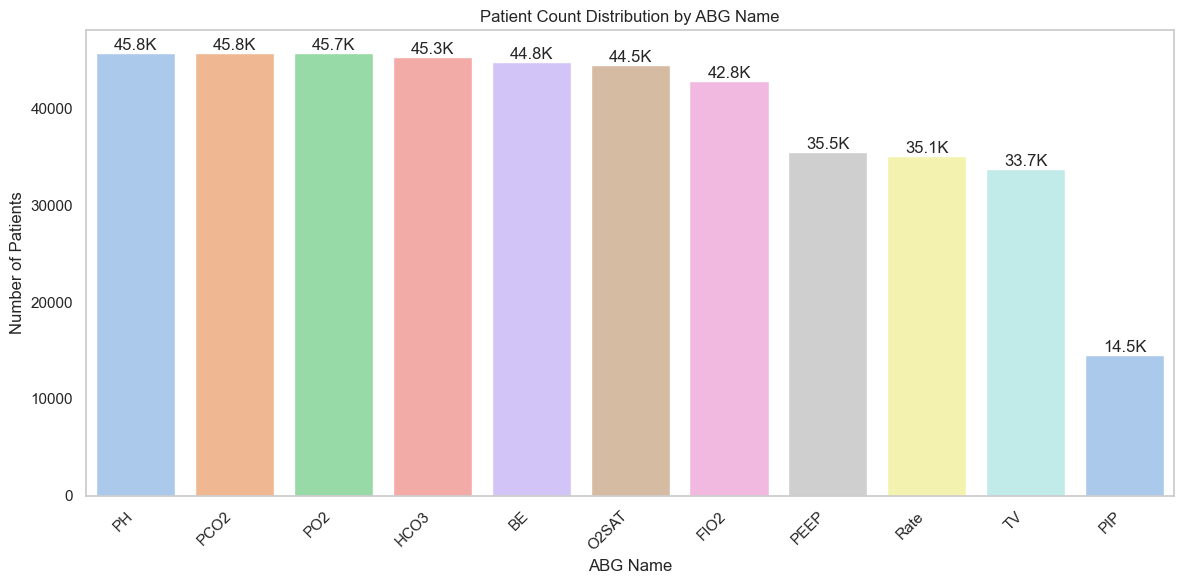

In [22]:
patient_counts = df_abgevents.groupby('abg_name')['patient_id'].nunique().sort_values(ascending=False)

# Create a new DataFrame with the counts
df_counts = pd.DataFrame({'abg_name': patient_counts.index, 'patient_count': patient_counts.values})

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='abg_name', y='patient_count', data=df_counts, palette='pastel')

# Set the title and labels
plt.title('Patient Count Distribution by ABG Name')
plt.xlabel('ABG Name')
plt.ylabel('Number of Patients')

# Remove grid lines
plt.grid(False)


def format_count(count):
    return f"{count / 1000:.1f}K" if count >= 1000 else str(count)

# Display the count on top of each bar
for p in ax.patches:
    count_value = int(p.get_height())
    ax.annotate(format_count(count_value), 
                (p.get_x() + p.get_width() / 2., count_value), 
                ha='center', va='bottom')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')


plt.tight_layout()

plt.show()

### Hourly distribution of ABG tests

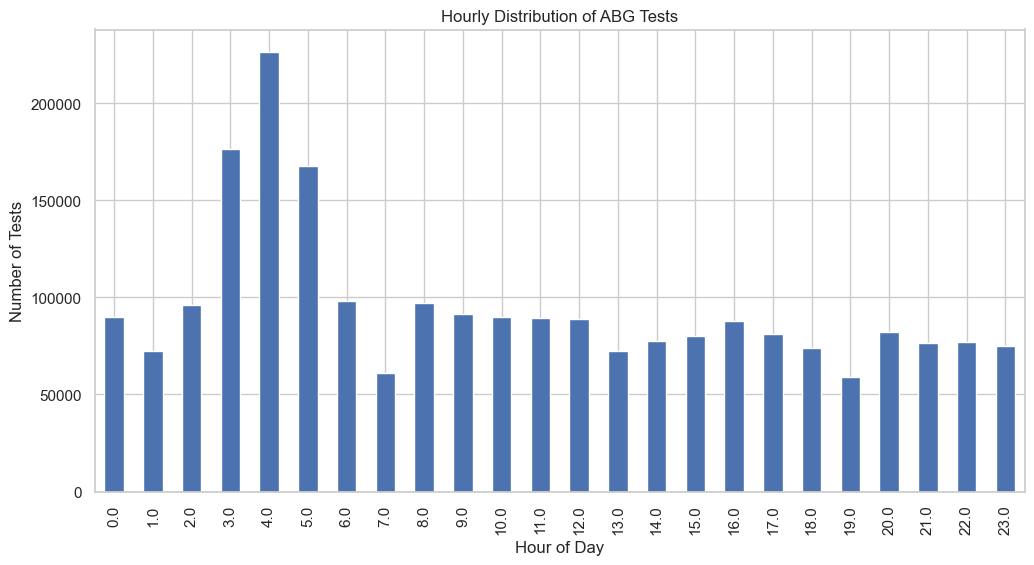

In [23]:
df_abgevents['abg_time_event'] = pd.to_datetime(df_abgevents['abg_time_event'])
df_abgevents['hour'] = df_abgevents['abg_time_event'].dt.hour
df_abgevents['day'] = df_abgevents['abg_time_event'].dt.day_name()
df_abgevents['month'] = df_abgevents['abg_time_event'].dt.month_name()

hourly_distribution = df_abgevents['hour'].value_counts().sort_index()
daily_distribution = df_abgevents['day'].value_counts()
monthly_distribution = df_abgevents['month'].value_counts()

# Plotting hourly distribution
plt.figure(figsize=(12, 6))
hourly_distribution.plot(kind='bar')
plt.title('Hourly Distribution of ABG Tests')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Tests')
plt.show()

### ABG Test distribution and Average tests per patient

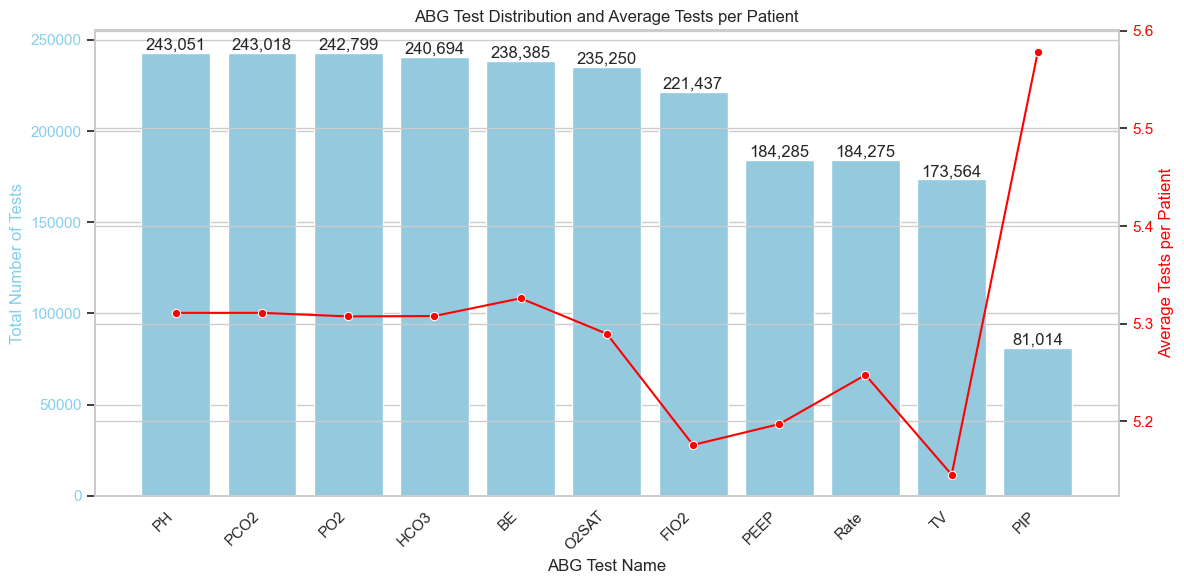

In [24]:
# Count the ABG tests
abg_counts = df_abgevents['abg_name'].value_counts().reset_index()
abg_counts.columns = ['abg_name', 'total_tests']

# Get the number of unique patients for each ABG test
abg_patients = df_abgevents.groupby('abg_name')['patient_id'].nunique().reset_index()
abg_patients.columns = ['abg_name', 'unique_patients']

# Merge the counts
abg_data = pd.merge(abg_counts, abg_patients, on='abg_name')

# Calculate the average tests per patient
abg_data['avg_tests_per_patient'] = abg_data['total_tests'] / abg_data['unique_patients']

# Sort by total tests
abg_data = abg_data.sort_values('total_tests', ascending=False)

# Create the visualization
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for total tests
sns.barplot(x='abg_name', y='total_tests', data=abg_data, ax=ax1, color='skyblue')
ax1.set_xlabel('ABG Test Name')
ax1.set_ylabel('Total Number of Tests', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Create a second y-axis for average tests per patient
ax2 = ax1.twinx()
sns.lineplot(x='abg_name', y='avg_tests_per_patient', data=abg_data, ax=ax2, color='red', marker='o')
ax2.set_ylabel('Average Tests per Patient', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add value labels on the bars
for i, v in enumerate(abg_data['total_tests']):
    ax1.text(i, v, f'{v:,}', ha='center', va='bottom')

plt.title('ABG Test Distribution and Average Tests per Patient')
plt.tight_layout()
plt.show()



###### displays the normal ranges for ABG parameters alongside their high and low thresholds. This is essential for understanding how these parameters relate to lung outcomes.if the dashed line for "Transplanted" falls within the normal range for a particular parameter, it suggests that patients who were transplanted had ABG values consistent with normal physiological function.

### ABG Parameters- Ranges and Lung Outcomes

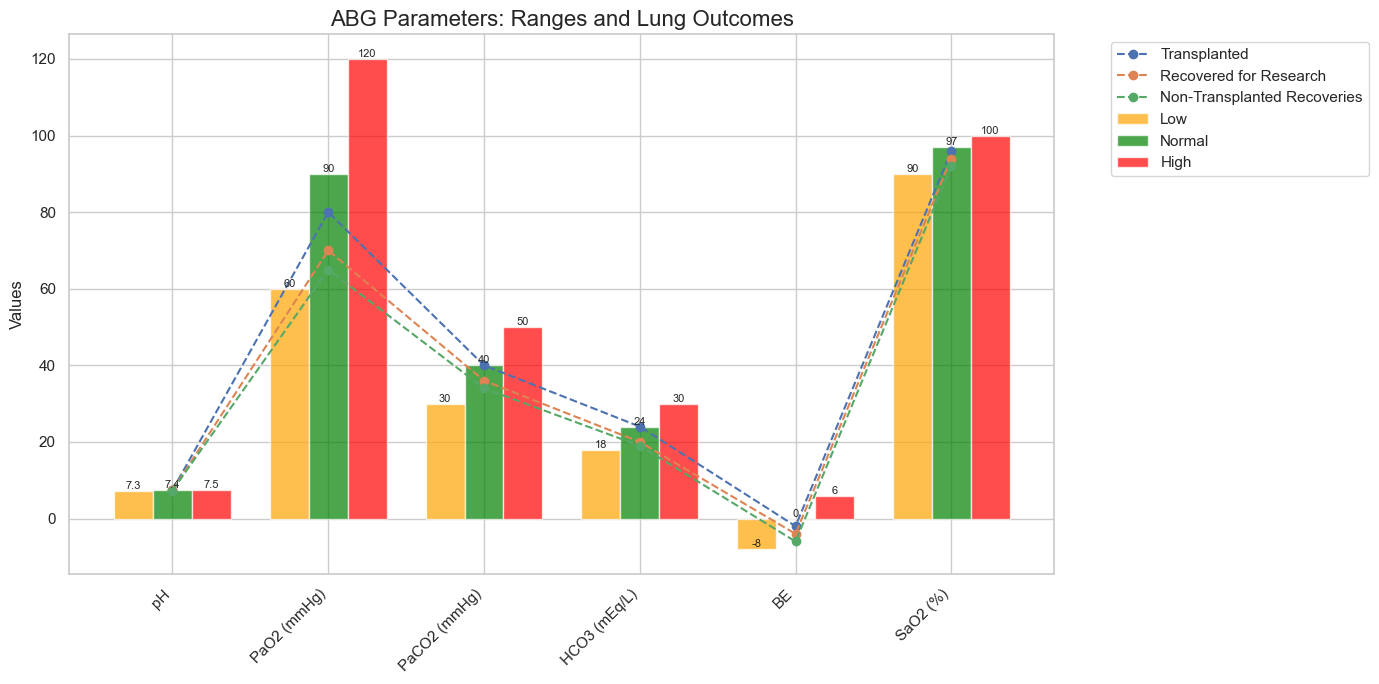

In [25]:
# ABG parameters and their ranges
parameters = ['pH', 'PaO2 (mmHg)', 'PaCO2 (mmHg)', 'HCO3 (mEq/L)', 'BE', 'SaO2 (%)']
normal = [7.40, 90, 40, 24, 0, 97]  # Normal values (midpoint of normal range)
low = [7.30, 60, 30, 18, -8, 90]    # Low values
high = [7.50, 120, 50, 30, 6, 100]  # High values

# Lung outcome thresholds
lung_outcome_thresholds = {
    'Transplanted': [7.4, 80, 40, 24, -2, 96],
    'Recovered for Research': [7.35, 70, 36, 20, -4, 94],
    'Non-Transplanted Recoveries': [7.3, 65, 34, 19, -6, 92]
}

x = np.arange(len(parameters))
width = 0.25

fig, ax = plt.subplots(figsize=(14, 7))

# Plotting bars for ABG parameters
ax.bar(x - width, low, width, label='Low', color='orange', alpha=0.7)
ax.bar(x, normal, width, label='Normal', color='green', alpha=0.7)
ax.bar(x + width, high, width, label='High', color='red', alpha=0.7)

# Overlay lung outcome thresholds
for i, (outcome_name, outcome_values) in enumerate(lung_outcome_thresholds.items()):
    ax.plot(x, outcome_values, marker='o', linestyle='--', label=outcome_name)

# Customizing the plot
ax.set_ylabel('Values', fontsize=12)
ax.set_title('ABG Parameters: Ranges and Lung Outcomes', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(parameters, rotation=45, ha='right')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Adding value labels on bars
for i in range(len(parameters)):
    ax.text(i - width, low[i], f'{low[i]}', ha='center', va='bottom', fontsize=8)
    ax.text(i, normal[i], f'{normal[i]}', ha='center', va='bottom', fontsize=8)
    ax.text(i + width, high[i], f'{high[i]}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


### Onset of Ventilation in patient distribution

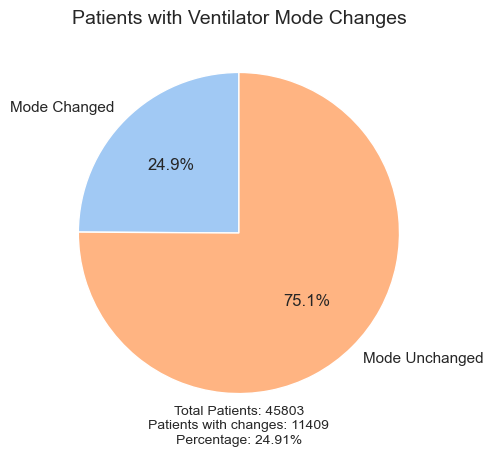

In [26]:
# Function to check if ventilator mode changed for a patient
def ventilator_mode_changed(group):
    return group['abg_ventilator_mode'].nunique() > 1

# Group by patient_id and check if ventilator mode changed
patients_with_changes = df_abgevents.groupby('patient_id').apply(ventilator_mode_changed)

# Count of patients with ventilator mode changes
patients_with_changes_count = patients_with_changes.sum()
total_patients = len(patients_with_changes)

# Calculate percentage
percentage_with_changes = (patients_with_changes_count / total_patients) * 100

# Create a smaller pie chart
plt.figure(figsize=(5,5))
plt.pie([patients_with_changes_count, total_patients - patients_with_changes_count],
        labels=['Mode Changed', 'Mode Unchanged'],
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette("pastel")[:2])
plt.title("Patients with Ventilator Mode Changes", fontsize=14)

# Add text annotation with smaller font
plt.text(0, -1.2, f"Total Patients: {total_patients}\nPatients with changes: {patients_with_changes_count}\nPercentage: {percentage_with_changes:.2f}%",
         ha='center', va='center', fontsize=10)

plt.axis('equal')
plt.tight_layout()
plt.show()




## CALC_DEATHS

In [27]:
### Calculated Deaths by Year and OPO

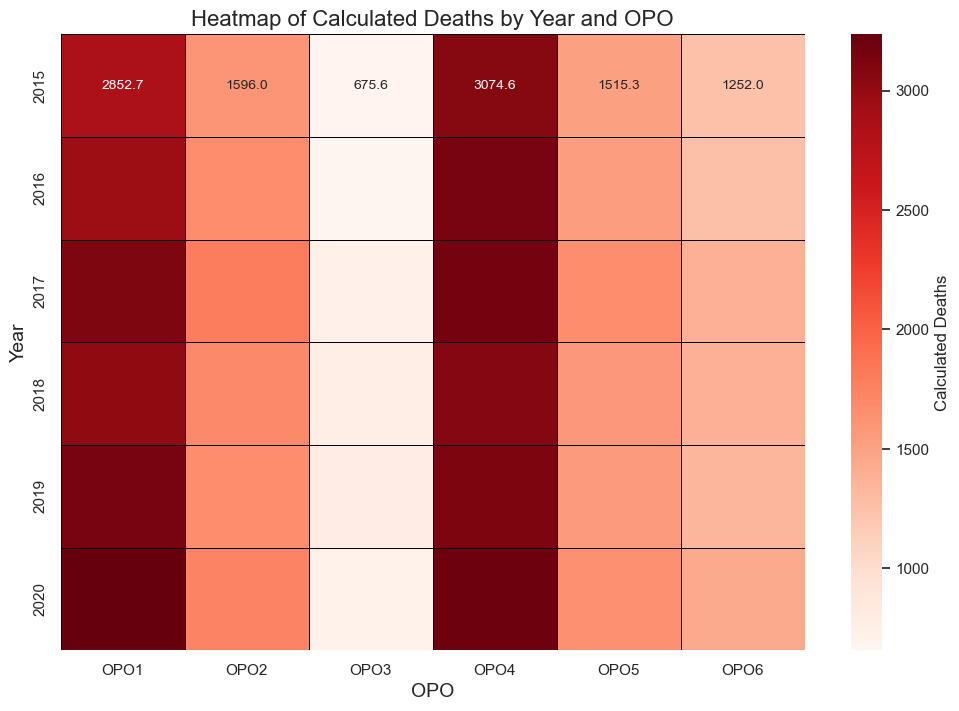

In [28]:
pivot_df = df_calcdeaths.pivot_table(index='year', columns='opo', values='calc_deaths', aggfunc='sum')
#print(pivot_df)
# just used the pivot_df in the below dataframe 

# pivot_df
pivot_df = pd.DataFrame({
    'OPO1': [2852.7, 2954.1, 3112.3, 3019.0, 3148.8, 3236.5],
    'OPO2': [1596.0, 1672.0, 1790.0, 1690.0, 1660.0, 1740.0],
    'OPO3': [675.6, 656.3, 730.3, 767.3, 780.1, 710.2],
    'OPO4': [3074.6, 3146.3, 3163.3, 3079.8, 3125.5, 3201.2],
    'OPO5': [1515.3, 1534.3, 1668.2, 1576.2, 1556.0, 1640.5],
    'OPO6': [1252.0, 1263.0, 1388.0, 1388.0, 1349.0, 1437.0]
}, index=[2015, 2016, 2017, 2018, 2019, 2020])

# Create the heatmap
plt.figure(figsize=(12, 8)) # Adjust figure size for better visibility
sns.set(font_scale=1) # Increase font scale for better readability
sns.heatmap(pivot_df,
            annot=True,
            fmt=".1f",
            cmap='Reds', # Dark red gradient
            cbar_kws={'label': 'Calculated Deaths'},
            linewidths=.5,
            linecolor='black', # Optional: Add lines between cells for better visibility
            annot_kws={"size": 10}) # Adjust annotation font size if necessary

# Set labels and title
plt.title('Heatmap of Calculated Deaths by Year and OPO', fontsize=16)
plt.xlabel('OPO', fontsize=14)
plt.ylabel('Year', fontsize=14)

# Show the plot
plt.show()

### Displaying the number of organs procured by each OPO

In [29]:
# Group by gender and opo, and calculate procured counts
grouped_df_gop = df_referrals.groupby(['gender', 'opo']).agg(
    No_of_Organs=('time_procured', lambda x: x.notnull().sum())
).reset_index()

# Calculate average deaths for each OPO
avg_deaths = df_calcdeaths.groupby('opo')['calc_deaths'].mean().reset_index()

# Merge the procured counts with average deaths
combined_df = pd.merge(grouped_df_gop, avg_deaths, on='opo', how='left')

# Create the sunburst chart
fig_sunburst = px.sunburst(
    combined_df,
    path=['gender', 'opo'],
    values='No_of_Organs',
    color='calc_deaths',
    color_continuous_scale='Viridis',
    custom_data=['No_of_Organs', 'calc_deaths'],
    title='Number of Organs and Calculated Deaths by Gender and OPO'
)

# Update trace information
fig_sunburst.update_traces(
    texttemplate="<b>%{label}</b><br>No. of Organs: %{customdata[0]}<br>Avg Deaths: %{customdata[1]:.2f}",
    textfont=dict(size=10),
    hovertemplate="<b>%{label}</b><br>No. of Organs: %{customdata[0]}<br>Avg Deaths: %{customdata[1]:.2f}<extra></extra>"
)

# Update layout to decrease size
fig_sunburst.update_layout(
    width=800,  # Decrease width
    height=600,  # Decrease height
    margin=dict(t=50, l=25, r=25, b=25),
    uniformtext=dict(minsize=10, mode='hide')
)

# Show the plot
fig_sunburst.show(config={'scrollZoom': True})



## CHEMISTRY EVENTS

### Distribution of Chemical Test Categories

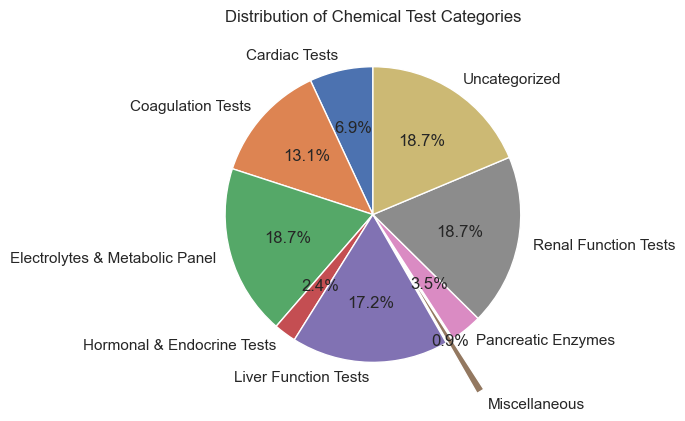

In [30]:
patient_count = df_chemistry_events.groupby('chem_test_category')['patient_id'].nunique().reset_index()
labels = patient_count['chem_test_category']
sizes = patient_count['patient_id']
explode = (0, 0, 0, 0,0,0.4,0,0, 0)  
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
      startangle=90)
ax.set_title('Distribution of Chemical Test Categories')
plt.show()

### Chemical Name Distribution

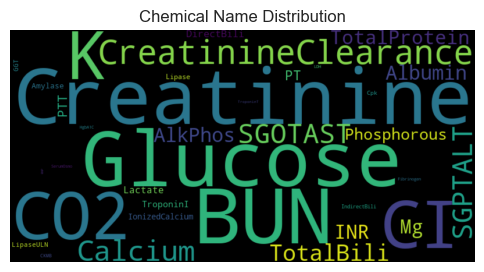

In [31]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(
    df_chemistry_events['chem_name'].value_counts())
plt.figure(figsize=(6,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Chemical Name Distribution')
plt.show()

C:\Users\srika\AppData\Local\Temp\ipykernel_19200\670844076.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\srika\AppData\Local\Temp\ipykernel_19200\670844076.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



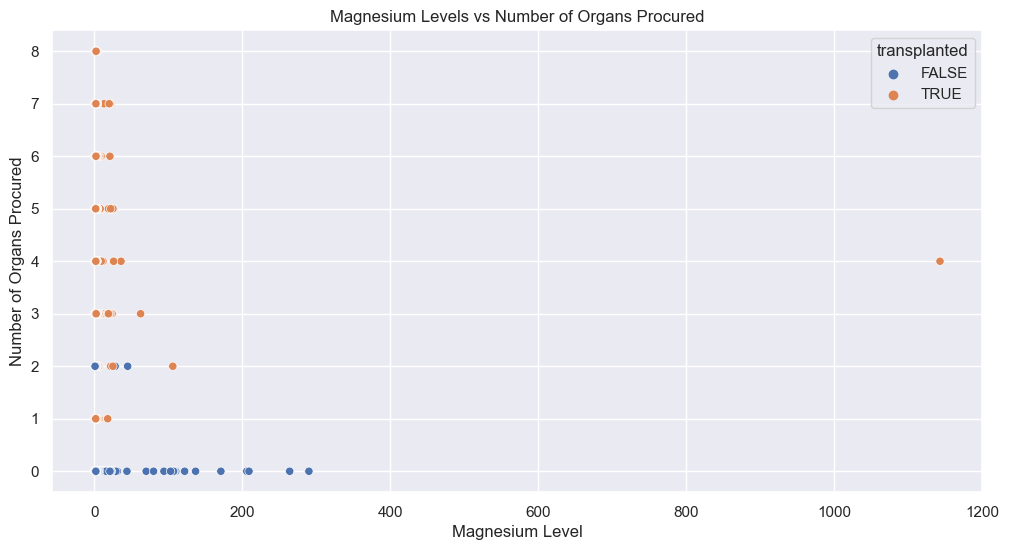

Average BNP level for transplanted hearts: 2403.35
Average BNP level for non-transplanted hearts: 2384.06340771283


In [32]:
# Merge the dataframes
merged_df = pd.merge(df_referrals, df_chemistry_events, left_on='patient_id', right_on='patient_id')

# 1. BNP levels and heart transplant outcome
bnp_data = merged_df[merged_df['chem_name'] == 'BNP']
bnp_data['heart_transplanted'] = bnp_data['outcome_heart'].apply(lambda x: 'Transplanted' if x == 'Transplanted' else 'Not Transplanted')

#plt.figure(figsize=(10, 6))
#sns.boxplot(x='heart_transplanted', y='chem_value', data=bnp_data)
#plt.title('BNP Levels vs Heart Transplant Outcome')
#plt.ylabel('BNP Level')
#plt.xlabel('Heart Transplant Outcome')
#plt.show()

# 2. Magnesium levels and number of organs procured
mg_data = merged_df[merged_df['chem_name'] == 'Mg']

# Count the number of procured organs
organ_columns = ['outcome_heart', 'outcome_liver', 'outcome_kidney_left', 'outcome_kidney_right', 
                 'outcome_lung_left', 'outcome_lung_right', 'outcome_intestine', 'outcome_pancreas']
mg_data['organs_procured'] = mg_data[organ_columns].apply(lambda row: row.notna().sum(), axis=1)
#print(mg_data.dtypes)
#mg_data['chem_value'] = pd.to_numeric(mg_data['chem_value'], errors='coerce')
#mg_data['organs_procured'] = pd.to_numeric(mg_data['organs_procured'], errors='coerce')
#print(mg_data.isnull().sum())
#mg_data.dropna(subset=['chem_value', 'organs_procured'], inplace=True)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='chem_value', y='organs_procured', hue='transplanted', data=mg_data)
plt.title('Magnesium Levels vs Number of Organs Procured')
plt.xlabel('Magnesium Level')
plt.ylabel('Number of Organs Procured')
plt.show()

# Print some summary statistics
print("Average BNP level for transplanted hearts:", 
      bnp_data[bnp_data['heart_transplanted'] == 'Transplanted']['chem_value'].mean())
print("Average BNP level for non-transplanted hearts:", 
     bnp_data[bnp_data['heart_transplanted'] == 'Not Transplanted']['chem_value'].mean())

#print("\nCorrelation between Mg levels and number of organs procured:", 
     # mg_data['chem_value'].corr(mg_data['organs_procured']))

### Magnesium Levels, Transplantation Status, and Average Organs Procured

In [33]:
# Merge df_chemistry_events with df_referrals
merged_df = pd.merge(df_chemistry_events, df_referrals, on='patient_id', how='inner')

# Filter for Mg tests
mg_df = merged_df[merged_df['chem_name'] == 'Mg']

# Create Mg range categories
mg_df['Mg_range'] = pd.cut(mg_df['chem_value'], 
                           bins=[0, 1.5, 2.5, float('inf')],
                           labels=['Low', 'Normal', 'High'])

# Count organs procured
organs = ['outcome_heart', 'outcome_liver', 'outcome_kidney_left', 'outcome_kidney_right', 
          'outcome_lung_left', 'outcome_lung_right', 'outcome_intestine', 'outcome_pancreas']
mg_df['organs_procured'] = mg_df[organs].notna().sum(axis=1)

# Group by Mg range and transplanted status
grouped_df = mg_df.groupby(['Mg_range', 'transplanted']).agg(
    count=('patient_id', 'count'),
    avg_organs=('organs_procured', 'mean')
).reset_index()

# Create the sunburst chart
fig = px.sunburst(
    grouped_df,
    path=['Mg_range', 'transplanted'],
    values='count',
    color='avg_organs',
    color_continuous_scale='Viridis',
    title='Magnesium Levels, Transplantation Status, and Average Organs Procured',
    hover_data=['count', 'avg_organs']
)

fig.update_layout(width=800, height=600)
fig.show()


C:\Users\srika\AppData\Local\Temp\ipykernel_19200\1950766411.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\srika\AppData\Local\Temp\ipykernel_19200\1950766411.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## REFERRALS

### 'Patient Distribution in Gender, OPO and Cause of Death as per unos'

In [34]:

# Sunburst chart creation
grouped_df = df_referrals.groupby(['gender', 'opo', 'cause_of_death_unos']).agg(patient_count=('patient_id', 'nunique')).reset_index()
grouped_df['percentage'] = grouped_df['patient_count'] / grouped_df['patient_count'].sum() * 100

fig_sunburst = px.sunburst(
    grouped_df,
    path=['gender', 'opo', 'cause_of_death_unos'],
    values='percentage',
    color='opo',
        color_discrete_sequence=px.colors.qualitative.Pastel,
    
    hover_data=['patient_count'],
    title='Patient Distribution in Gender, OPO and Cause of Death as per unos'
)

fig_sunburst.update_traces(textinfo='label+percent entry')
fig_sunburst.update_layout(
    margin=dict(t=30, l=0, r=0, b=0),
    uniformtext=dict(minsize=9, mode='hide')
)
fig_sunburst.show()

fig_sunburst = px.sunburst(
    grouped_df,
    path=['gender', 'opo', 'cause_of_death_unos'],
    values='patient_count',
    color='opo',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    hover_data=['patient_count', 'percentage'],
    title='Patient Distribution in Gender, OPO and Cause of Death as per unos'
)

fig_sunburst.update_traces(
texttemplate="<b>%{label}</b><br>%{value}",   
    textfont=dict(size=8)
)
fig_sunburst.update_traces(
 texttemplate="<b>%{label}</b><br><b>%{value}</b>",     
    textfont=dict(size=8)
)
fig_sunburst.update_layout(
    margin=dict(t=30, l=0, r=0, b=0),
    uniformtext=dict(minsize=8, mode='hide')
)
fig_sunburst.show()



### Transplanted Patients by Referral and Procured Year

In [35]:
# Filter for transplanted patients and group the data
groupeddf_stack = df_referrals[df_referrals['transplanted'] == 'TRUE'].groupby(['procured_year', 'referral_year']).agg(patient_count=('patient_id', 'nunique')).reset_index()

# Convert procured_year and referral_year to strings for better handling
groupeddf_stack['procured_year'] = groupeddf_stack['procured_year'].astype(str)
groupeddf_stack['referral_year'] = groupeddf_stack['referral_year'].astype(str)

# Sort the dataframe by referral_year and procured_year
groupeddf_stack = groupeddf_stack.sort_values(['referral_year', 'procured_year'])

# Create the horizontal stacked grouped bar chart
fig = px.bar(groupeddf_stack,
             y='referral_year',
             x='patient_count',
             color='procured_year',
             labels={'patient_count': 'Transplanted Patient Count', 
                     'referral_year': 'Referral Year', 
                     'procured_year': 'Procured Year'},
             title='Transplanted Patients by Referral and Procured Year',
             orientation='h',
             color_discrete_sequence=px.colors.qualitative.Pastel)

# Update the layout for horizontal bars
fig.update_layout(
    barmode='stack',  # Use stack mode for stacked bars
    yaxis=dict(
        title='Referral Year',
        title_font=dict(size=10),
        tickfont=dict(size=12)
    ),
    xaxis=dict(
        title='Transplanted Patient Count',
        title_font=dict(size=12),
        tickfont=dict(size=10)
    ),
    legend=dict(
        title='Procured Year',
        title_font=dict(size=12),
        font=dict(size=10)
    ),
    title=dict(
        font=dict(size=16)
    ),
   
)

# Add labels inside the bars, ensuring visibility for small counts
for trace in fig.data:
    trace.text = trace.x  # Show counts on the bars
    trace.textposition = 'inside'
    trace.textfont = dict(color='black', size=10)
    trace.insidetextanchor = 'middle'
    
    # Add border lines to the bars
    trace.marker.line.color = 'black'  # Border color
    trace.marker.line.width = 1  # Border width

# Adjust text visibility and formatting
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

# Show the figure
fig.show()
total_patients = groupeddf_stack['patient_count'].sum()
average_patients_per_referral_year = groupeddf_stack['patient_count'].mean()
max_patients_per_referral_year = groupeddf_stack['patient_count'].max()
min_patients_per_referral_year = groupeddf_stack['patient_count'].min()
procured_summary = groupeddf_stack.groupby('procured_year')['patient_count'].agg(['sum', 'mean', 'count']).reset_index()
procured_summary.columns = ['Procured Year', 'Total Patients', 'Average Patients', 'Count of Referral Years']

# Displaying the summary statistics
print("Overall Summary Statistics:")
print(f"Total Transplanted Patients: {total_patients}")
print(f"Average Patients per Referral Year: {average_patients_per_referral_year:.2f}")
print(f"Maximum Patients in a Referral Year: {max_patients_per_referral_year}")
print(f"Minimum Patients in a Referral Year: {min_patients_per_referral_year}")

#print("\nProcured Year Summary:")
#print(procured_summary)

Overall Summary Statistics:
Total Transplanted Patients: 8971
Average Patients per Referral Year: 640.79
Maximum Patients in a Referral Year: 1537
Minimum Patients in a Referral Year: 7


### Blood Type Distribution of Transplanted Patients

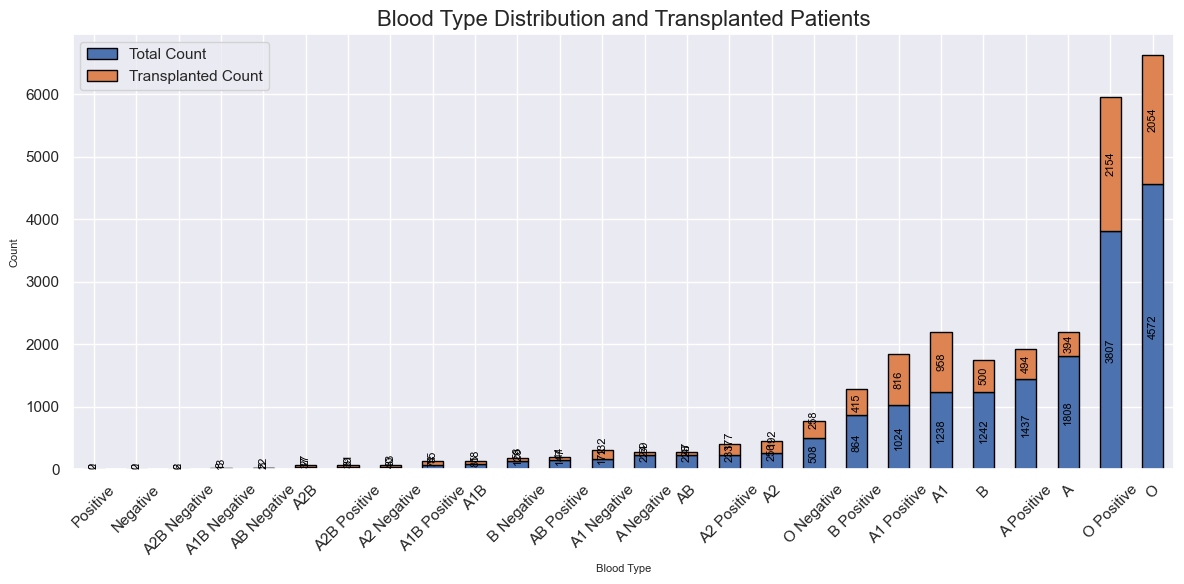

In [36]:
# Count occurrences of each blood type
blood_type_counts = df_referrals['complete_blood_type'].value_counts().sort_index()

# Count occurrences of transplanted patients for each blood type
transplanted_counts = df_referrals[df_referrals['transplanted'] == 'TRUE']['complete_blood_type'].value_counts().sort_index()

# Create a DataFrame to hold both counts
blood_type_summary = pd.DataFrame({
    'Total Count': blood_type_counts,
    'Transplanted Count': transplanted_counts
}).fillna(0)  # Fill NaN values with 0 for blood types with no transplanted patients

# Sort by Total Count for increasing order
blood_type_summary = blood_type_summary.sort_values(by='Total Count')

# Create a stacked bar plot
ax = blood_type_summary.plot(kind='bar', stacked=True, figsize=(12, 6), edgecolor='black')
plt.title('Blood Type Distribution and Transplanted Patients', fontsize=16)
plt.xlabel('Blood Type', fontsize=8)
plt.ylabel('Count', fontsize=8)
plt.xticks(rotation=45)

for i in range(blood_type_summary.shape[0]):
    for j in range(blood_type_summary.shape[1]):
        count_value = blood_type_summary.iloc[i, j]
        
        # Determine the position for the text label
        if count_value < 300:  # If count is small
            # Position above the bar
            y_position = blood_type_summary.iloc[i, :j+1].sum() - (count_value / 2) + 1
            ax.text(i, y_position, str(int(count_value)), ha='center', va='bottom', fontsize=8, color='black', rotation=90)
        else:  # If count is large
            # Position inside the bar
            y_position = blood_type_summary.iloc[i, :j+1].sum() - (count_value / 2)
            ax.text(i, y_position, str(int(count_value)), ha='center', va='center', fontsize=8, color='black', rotation=90)

# Optional: Rotate all text labels if desired
# ax.text(i, y_position, str(int(count_value)), ha='center', va='center', fontsize=10, color='black', rotation=90)
plt.tight_layout()
plt.show()

### Organ Transplantation by BMI Group

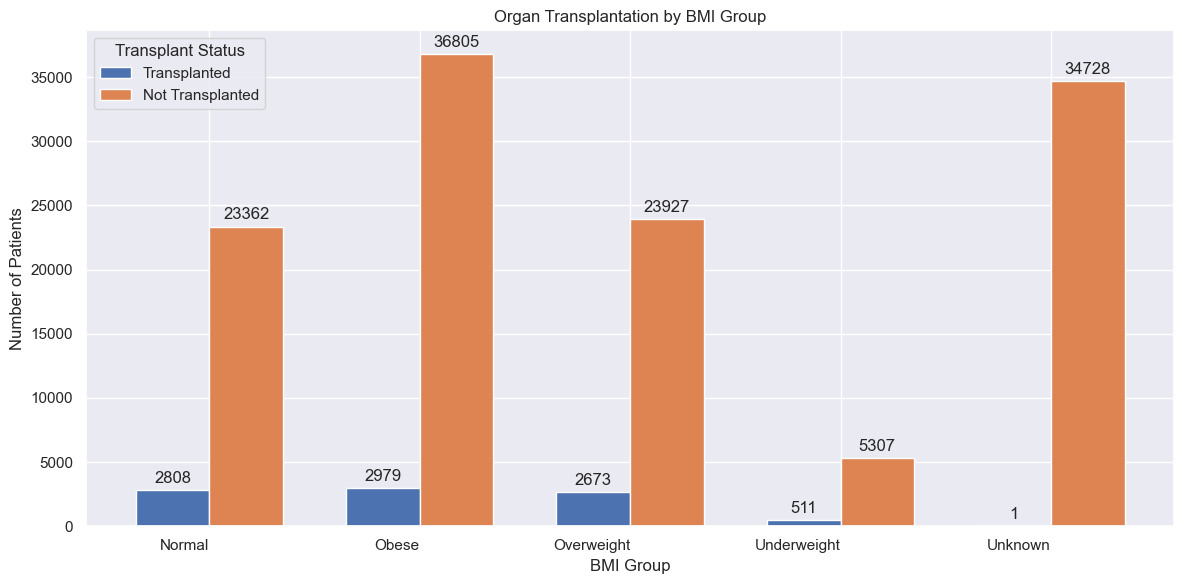

In [37]:
# Creating BMI bins
def categorize_bmi(bmi):
    if pd.isna(bmi):
        return 'Unknown'
    elif bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

# Adding BMI group column to referrals
df_referrals_with_bmi_group_n = df_referrals.copy()
df_referrals_with_bmi_group_n['bmi_group'] = df_referrals_with_bmi_group_n['bmi'].apply(categorize_bmi)

# Grouping by BMI and count transplanted (True) and not transplanted (False)
grouped_bmi_transplantion = df_referrals_with_bmi_group_n.groupby('bmi_group').agg(
    Transplanted=('transplanted', lambda x: (x == 'TRUE').sum()),
    Not_Transplanted=('transplanted', lambda x: (x == 'FALSE').sum())
).reset_index()

# Grouped bar plot
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(grouped_bmi_transplantion['bmi_group']))
width = 0.35

rects1 = ax.bar(x - width/2, grouped_bmi_transplantion['Transplanted'], width, label='Transplanted')
rects2 = ax.bar(x + width/2, grouped_bmi_transplantion['Not_Transplanted'], width, label='Not Transplanted')

ax.set_title('Organ Transplantation by BMI Group')
ax.set_xlabel('BMI Group')
ax.set_ylabel('Number of Patients')
ax.set_xticks(x)
ax.set_xticklabels(grouped_bmi_transplantion['bmi_group'], rotation=0, ha='right')

ax.legend(title='Transplant Status')

# Adding value labels on the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

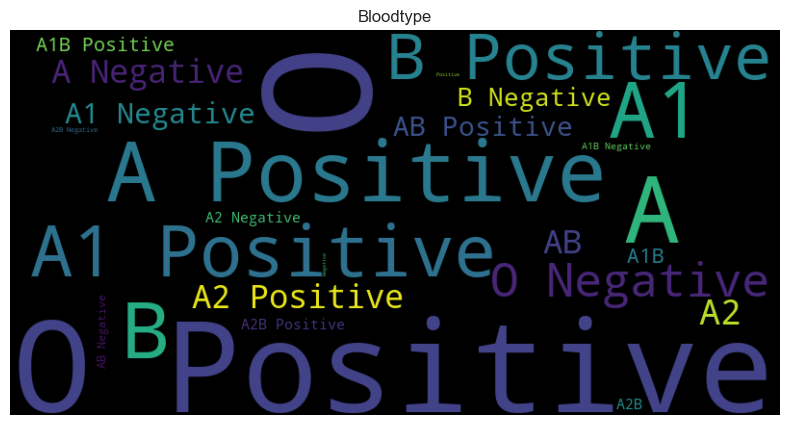

In [38]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(
    df_referrals['complete_blood_type'].value_counts())
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Bloodtype')
plt.show()

### Organ Procurement Process by OPO

In [39]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

# check once
df_referrals['procured'] = df_referrals['time_procured'].notna()

# Group the data
result = df_referrals.groupby('opo').agg({
    'approached': lambda x: (x == 'TRUE').sum(),
    'authorized': lambda x: (x == 'TRUE').sum(),
    'transplanted': lambda x: (x == 'TRUE').sum(),
    'procured': 'sum',
    'patient_id': 'count'
}).reset_index()


# Sort out the result by total count (patient_id) in descending order
result = result.sort_values('patient_id', ascending=False)

# Define categories
category_order = ['approached', 'authorized', 'procured', 'transplanted']

result = result.sort_values('patient_id', ascending=False)

colors = px.colors.qualitative.Vivid[:len(category_order)]

fig = make_subplots(rows=1, cols=1)

for i, category in enumerate(category_order):
    fig.add_trace(
        go.Bar(
            y=result['opo'],
            x=result[category],
            name=category.capitalize(),
            orientation='h',
            marker_color=colors[i],
            marker_line=dict(color='black', width=1),
            text=[f'{category.capitalize()}: {x}' for x in result[category]],
            textposition='auto',
            textfont=dict(color='black', size=12, family='Arial'),
            insidetextanchor='start'
        )
    )
   
 # for layout
fig.update_layout(
    barmode='group',
    title='Organ Procurement Process by OPO',
    xaxis_title='Count',
    yaxis_title='OPO',
    legend_title='Status',
    height=750,
    width=900,
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(family="Arial", size=13),
    shapes=[
        dict(
            type="rect",
            xref="paper",
            yref="paper",
            x0=0,
            y0=0,
            x1=1,
            y1=1,
            line=dict(color="black", width=2),
            fillcolor="rgba(0,0,0,0)",
        ),
    ],
    margin=dict(t=50, l=50, r=50, b=50)
)
legend=dict(
    x=0.2, 
    y=0.3,  
    bgcolor='rgba(255,255,255,0.8)',  
    bordercolor='Black',
    borderwidth=1
)

fig.update_xaxes(showgrid=False, gridwidth=1, gridcolor='white')
fig.update_yaxes(showgrid=False, gridwidth=1, gridcolor='white')

fig.show()

### Organ Outcome Distribution

In [40]:
#  df_referrals is our DataFrame
organs = ['heart', 'liver', 'kidney_left', 'kidney_right', 'lung_left', 'lung_right', 'intestine', 'pancreas']

# Define a color for each organ
organ_colors = {
    'heart': '#FF9999', 'kidney_left': '#66B2FF', 'kidney_right': '#41FF99',
    'lung_left': '#FFCC99', 'lung_right': '#FF99CC', 'intestine': '#19CCGG',
    'pancreas': '#FFFF69'
}

# Create a list to store the data for each organ
data = []

for organ in organs:
    column_name = f'outcome_{organ}'
    if column_name in df_referrals.columns:
        organ_data = df_referrals[column_name].value_counts().reset_index()
        organ_data.columns = ['outcome', 'count']
        organ_data['organ'] = organ
        organ_data['label'] = organ_data.apply(lambda row: f"{row['outcome']} ({row['count']})", axis=1)
        data.append(organ_data)

# Combine all the data
combined_data = pd.concat(data, ignore_index=True)

# Create the sunburst chart
fig = px.sunburst(
    combined_data,
    path=['organ', 'label'],
    values='count',
    title='Organ Outcome Distribution',
    color='organ',
    color_discrete_map=organ_colors
)

# Update layout for better readability
fig.update_layout(
    width=900,
    height=900,
    uniformtext=dict(minsize=8.5, mode='hide')
)

# Update traces to show labels and remove hover
fig.update_traces(
    textinfo='label',
    hoverinfo='none',
    textfont_size=12,
    textfont=dict(size=12, family="Arial ", color="black")
)

# Show the figure
fig.show()

### Organ transplantation of Asystole and Brain deaths

In [41]:
# Creating a copy of the original DataFrame
df_analysis = df_referrals.copy()

# Creating boolean columns for each timestamp column
df_analysis['asystole_happened'] = df_analysis['time_asystole'].notna()
df_analysis['brain_death_happened'] = df_analysis['time_brain_death'].notna()

# Counting patients for each event
cardiac_failure_asystole_patients= df_analysis[df_analysis['asystole_happened']]['patient_id'].nunique()
brain_death_patients = df_analysis[df_analysis['brain_death_happened']]['patient_id'].nunique()

# Counting patients who had both events
patients_with_both_events = df_analysis[df_analysis['asystole_happened'] & df_analysis['brain_death_happened']]['patient_id'].nunique()

# Counting patients who had at least one of the events
patients_with_any_event = df_analysis[df_analysis['asystole_happened'] | df_analysis['brain_death_happened']]['patient_id'].nunique()

# Total count of patients
total_patients = df_analysis['patient_id'].nunique() 


print(f"Patients with asystole: {cardiac_failure_asystole_patients}")
print(f"Patients with brain death: {brain_death_patients}")
print(f"Patients with both asystole and brain death: {patients_with_both_events}")
print(f"Patients with at least one of the events: {patients_with_any_event}")
print(f"Total number of patients: {total_patients}")

# Calculating patients with only one event
only_cardiac_failure_asystole = cardiac_failure_asystole_patients - patients_with_both_events
only_brain_death = brain_death_patients - patients_with_both_events

print(f"\nPatients with only asystole: {only_cardiac_failure_asystole}")
print(f"Patients with only brain death: {only_brain_death}")

# Creating a summary DataFrame
summary = pd.DataFrame({
    'Event': ['only_cardiac_failure_asystole', 'Only Brain Death', 'Both Events', 'No Events'],
    'Patient Count': [
        only_cardiac_failure_asystole,
        only_brain_death,
        patients_with_both_events,
        total_patients - patients_with_any_event
    ]
})

summary['Percentage'] = summary['Patient Count'] / total_patients * 100

print("\nSummary:")
print(summary)


Patients with asystole: 89415
Patients with brain death: 11855
Patients with both asystole and brain death: 3520
Patients with at least one of the events: 97750
Total number of patients: 133101

Patients with only asystole: 85895
Patients with only brain death: 8335

Summary:
                           Event  Patient Count  Percentage
0  only_cardiac_failure_asystole          85895   64.533700
1               Only Brain Death           8335    6.262162
2                    Both Events           3520    2.644608
3                      No Events          35351   26.559530


In [42]:
# creating a dataframe for only patients dead by heart stopping
Cardiac_asystole_death_df = df_referrals[
    (df_referrals['time_asystole'].notnull())  &
    (df_referrals['outcome_heart'] == 'Transplanted') &
    (df_referrals['outcome_liver'] == 'Transplanted') &
    (df_referrals['outcome_kidney_left'] == 'Transplanted') |
    (df_referrals['outcome_kidney_right'] == 'Transplanted') &
    (df_referrals['outcome_lung_left'] == 'Transplanted') |
    (df_referrals['outcome_lung_right'] == 'Transplanted') &
    (df_referrals['outcome_intestine'] == 'Transplanted') &
    (df_referrals['outcome_pancreas'] == 'Transplanted')
]

# Selecting the required columns
result_cardiac = Cardiac_asystole_death_df[[
    'patient_id', 'time_asystole','outcome_heart', 'outcome_liver', 'outcome_kidney_left',
    'outcome_kidney_right', 'outcome_lung_left', 'outcome_lung_right',
    'outcome_intestine', 'outcome_pancreas'
]]

# Getting counts for each category
Cardiac_asystole_counts = {
    'total_count_cardiac': len(result_cardiac),
    'Cardiac_asystole_death_count': (result_cardiac['time_asystole'].notnull()).sum(),
    'heart_transplant_count': (result_cardiac['outcome_heart'] == 'Transplanted').sum(),
    'liver_transplant_count': (result_cardiac['outcome_liver'] == 'Transplanted').sum(),
    'left_kidney_transplant_count': (result_cardiac['outcome_kidney_left'] == 'Transplanted').sum(),
    'right_kidney_transplant_count': (result_cardiac['outcome_kidney_right'] == 'Transplanted').sum(),
    'left_lung_transplant_count': (result_cardiac['outcome_lung_left'] == 'Transplanted').sum(),
    'right_lung_transplant_count': (result_cardiac['outcome_lung_right'] == 'Transplanted').sum(),
    'intestine_transplant_count': (result_cardiac['outcome_intestine'] == 'Transplanted').sum(),
    'pancreas_transplant_count': (result_cardiac['outcome_pancreas'] == 'Transplanted').sum()
}

# creating a dataframe for only patients dead by brain death
braindeath_df = df_referrals[
    (df_referrals['brain_death'] == 'TRUE') &
    (df_referrals['outcome_heart'] == 'Transplanted') &
    (df_referrals['outcome_liver'] == 'Transplanted') &
    (df_referrals['outcome_kidney_left'] == 'Transplanted') |
    (df_referrals['outcome_kidney_right'] == 'Transplanted') &
    (df_referrals['outcome_lung_left'] == 'Transplanted') |
    (df_referrals['outcome_lung_right'] == 'Transplanted') &
    (df_referrals['outcome_intestine'] == 'Transplanted') &
    (df_referrals['outcome_pancreas'] == 'Transplanted')
]

# Selecting the required columns
result_brain = braindeath_df[[
    'patient_id', 'brain_death','outcome_heart', 'outcome_liver', 'outcome_kidney_left',
    'outcome_kidney_right', 'outcome_lung_left', 'outcome_lung_right',
    'outcome_intestine', 'outcome_pancreas'
]]

# Getting counts for each category
Braindead_counts = {
    'total_count': len(result_brain),
    'brain_death_count': (result_brain['brain_death'] == 'TRUE').sum(),
    'heart_transplant_count': (result_brain['outcome_heart'] == 'Transplanted').sum(),
    'liver_transplant_count': (result_brain['outcome_liver'] == 'Transplanted').sum(),
    'left_kidney_transplant_count': (result_brain['outcome_kidney_left'] == 'Transplanted').sum(),
    'right_kidney_transplant_count': (result_brain['outcome_kidney_right'] == 'Transplanted').sum(),
    'left_lung_transplant_count': (result_brain['outcome_lung_left'] == 'Transplanted').sum(),
    'right_lung_transplant_count': (result_brain['outcome_lung_right'] == 'Transplanted').sum(),
    'intestine_transplant_count': (result_brain['outcome_intestine'] == 'Transplanted').sum(),
    'pancreas_transplant_count': (result_brain['outcome_pancreas'] == 'Transplanted').sum()
}

Braindead_counts_df = pd.DataFrame([Braindead_counts])

# Display the results
#print("Filtered Data:")
#print(result_brain)
print("\nCounts:")
print(Braindead_counts)


Counts:
{'total_count': 3271, 'brain_death_count': 3192, 'heart_transplant_count': 2580, 'liver_transplant_count': 3112, 'left_kidney_transplant_count': 3210, 'right_kidney_transplant_count': 3217, 'left_lung_transplant_count': 1880, 'right_lung_transplant_count': 1809, 'intestine_transplant_count': 58, 'pancreas_transplant_count': 745}


In [43]:
import plotly.express as px
from plotly.subplots import make_subplots

# Assuming you have your data prepared (summary, asystole_counts, brain_death_counts, organs)
organs = ['Heart', 'Liver', 'Left Kidney', 'Right Kidney', 'Left Lung', 'Right Lung', 'Intestine', 'Pancreas']

# Assuming these counts are already calculated
asystole_counts = [
    Cardiac_asystole_counts['heart_transplant_count'],
    Cardiac_asystole_counts['liver_transplant_count'],
    Cardiac_asystole_counts['left_kidney_transplant_count'],
    Cardiac_asystole_counts['right_kidney_transplant_count'],
    Cardiac_asystole_counts['left_lung_transplant_count'],
    Cardiac_asystole_counts['right_lung_transplant_count'],
    Cardiac_asystole_counts['intestine_transplant_count'],
    Cardiac_asystole_counts['pancreas_transplant_count']
]

brain_death_counts = [
    Braindead_counts['heart_transplant_count'],
    Braindead_counts['liver_transplant_count'],
    Braindead_counts['left_kidney_transplant_count'],
    Braindead_counts['right_kidney_transplant_count'],
    Braindead_counts['left_lung_transplant_count'],
    Braindead_counts['right_lung_transplant_count'],
    Braindead_counts['intestine_transplant_count'],
    Braindead_counts['pancreas_transplant_count']
]

# Create subplots: 1 row, 2 columns
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

# First subplot: Patient Distribution Pie Chart
patient_dist = px.pie(
    summary,
    values='Patient Count',
    names='Event',
    title="Patient Distribution",
    hole=0.3,
    color_discrete_sequence=px.colors.sequential.Plasma
)

# Add patient distribution traces to the figure
for trace in patient_dist.data:
    trace.update(
        textinfo='label+percent+value',  # Show label, percent, and value
        marker=dict(line=dict(color='white', width=2)),  # Set border color and width
        textfont=dict(size=10)  # Adjust font size
    )
    fig.add_trace(trace, row=1, col=1)  # Add trace to the first subplot

# Second subplot: Double-layered Donut Chart for Organ Transplants
asystole_donut = px.pie(
    values=asystole_counts,
    names=organs,
    hole=0.3,
    title="Asystole",
    color_discrete_sequence=px.colors.sequential.Blues
)

for trace in asystole_donut.data:
    trace.domain = dict(x=[0.5, 1], y=[0, 1])
    trace.update(
        textinfo='label+percent+value',  # Show label, percent, and value
        marker=dict(line=dict(color='white', width=2)),  # Set border color and width
        textfont=dict(size=6)  # Adjust font size
    )
    fig.add_trace(trace, row=1, col=2)  # Add trace to the second subplot

brain_death_donut = px.pie(
    values=brain_death_counts,
    names=organs,
    hole=0.5,
    title="Brain Death",
    color_discrete_sequence=px.colors.sequential.Oranges
)

for trace in brain_death_donut.data:
    trace.domain = dict(x=[0.52, 0.98], y=[0.02, 0.98])
    trace.update(
        textinfo='label+percent+value',  # Show label, percent, and value
        marker=dict(line=dict(color='white', width=2)),  # Set border color and width
        textfont=dict(size=8)  # Adjust font size
    )
    fig.add_trace(trace, row=1, col=2)  # Add trace to the second subplot

# Calculate summary statistics
total_asystole = sum(asystole_counts)
total_brain_death = sum(brain_death_counts)

# Add summary statistics as text annotations
fig.add_annotation(
    text=f"Total Asystole Transplants: {total_asystole}<br>Total Brain Death Transplants: {total_brain_death}",
    x=0.5, y=1.15,  # Position above the plots
    showarrow=False,
    font=dict(size=14)
)

# Add annotations for inner donuts
fig.add_annotation(
    text="Inner Donut: Asystole Transplants",
    x=0.75, y=0.5,  # Adjust these coordinates to position the text correctly
    showarrow=False,
    font=dict(size=9, color="blue")
)

fig.add_annotation(
    text="Inner Donut: Brain Death Transplants",
    x=0.75, y=0.1,  # Adjust these coordinates to position the text correctly
    showarrow=False,
    font=dict(size=9, color="orange")
)

# Update layout
fig.update_layout(
    title_text="Patient Distribution and Organ Transplants",
    annotations=[
        dict(text='Patient<br>Distribution', x=0.20, y=0.95, font_size=10, showarrow=False),
        dict(text='Organ<br>Transplants', x=0.80, y=0.95, font_size=10, showarrow=False)
    ],
    margin=dict(t=50),  # Adjust top margin to prevent overlap
    legend=dict(
        orientation="v",  # Vertical orientation
        x=1.15,  # Position to the right
        y=1,  # Position at the top
        traceorder="normal",
        title_font=dict(size=8),
        font=dict(size=8)
    )
)

# Show the figure
fig.show()


### Average time taken for Organ procurement process

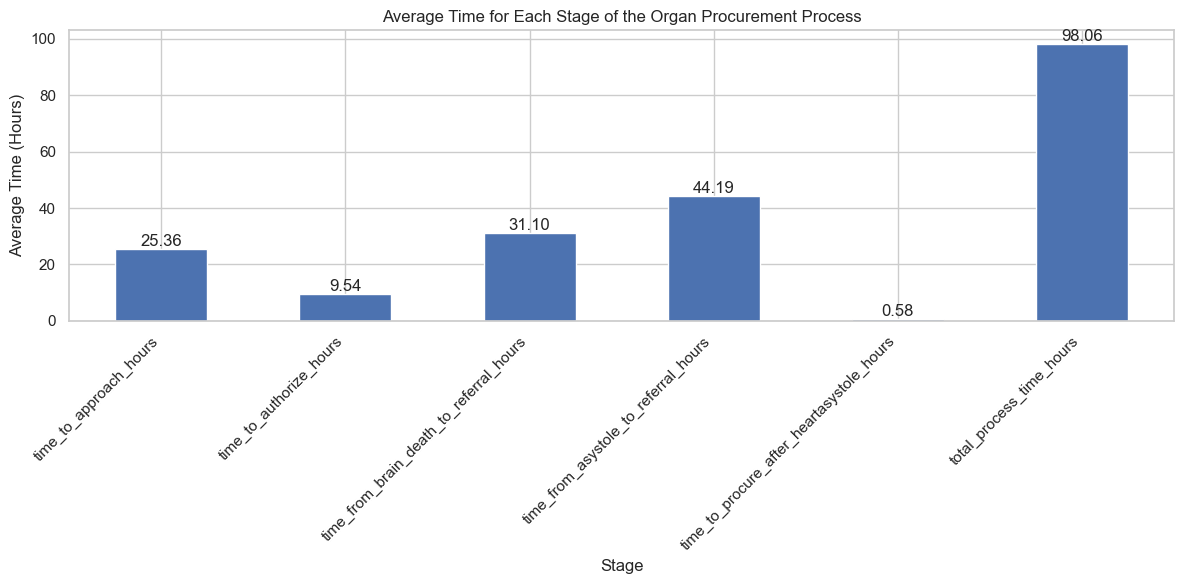

Analysis Insight:
The average time difference between procurement time and time of death is 0.6 hours.This time has to be maintained


In [44]:
import seaborn as sns
sns.set_style("whitegrid")
# Creating a new DataFrame for analysis
df_time_analysis = pd.DataFrame()

# Defining time columns
time_columns = ['time_referred', 'time_approached', 'time_authorized', 'time_procured', 'time_asystole', 'time_brain_death']

# Converting time columns to datetime
for col in time_columns:
    df_time_analysis[col] = pd.to_datetime(df_referrals[col], errors='coerce')

# Calculating time differences
df_time_analysis['time_to_approach'] = df_time_analysis['time_approached'] - df_time_analysis['time_referred']
df_time_analysis['time_to_authorize'] = df_time_analysis['time_authorized'] - df_time_analysis['time_approached']
df_time_analysis['time_to_procure_after_heartasystole'] = df_time_analysis['time_procured'] - df_time_analysis['time_asystole']
df_time_analysis['total_process_time'] = df_time_analysis['time_procured'] - df_time_analysis['time_referred']
df_time_analysis['time_from_asystole_to_referral'] = df_time_analysis['time_asystole'] - df_time_analysis['time_referred']
df_time_analysis['time_from_brain_death_to_referral'] = df_time_analysis['time_brain_death'] - df_time_analysis['time_referred']

# Converting time differences to hours
time_diff_columns = ['time_to_approach', 'time_to_authorize','time_from_brain_death_to_referral',
                     'time_from_asystole_to_referral','time_to_procure_after_heartasystole', 'total_process_time']
for col in time_diff_columns:
    df_time_analysis[f'{col}_hours'] = df_time_analysis[col].dt.total_seconds() / 3600

# Calculating average times
avg_times = df_time_analysis[[f'{col}_hours' for col in time_diff_columns]].mean()


plt.figure(figsize=(12, 6))
avg_times.plot(kind='bar')
plt.title('Average Time for Each Stage of the Organ Procurement Process')
plt.xlabel('Stage')
plt.ylabel('Average Time (Hours)')
plt.xticks(rotation=45, ha='right')

for i, v in enumerate(avg_times):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

print('Analysis Insight:')
print('The average time difference between procurement time and time of death is 0.6 hours.This time has to be maintained')


## FLUID_BALANCE_EVENTS

In [45]:
df_referrals1 = df_referrals.copy()
df_abg = df_abgevents.copy()
df_cbc = df_cbc_events.copy()
df_culture = df_culture_events.copy()
df_chemistry = df_chemistry_events.copy()
df_fluidbal = df_fluid_balance_events.copy()

In [46]:
df_calcdeath = df_calcdeaths.copy()
#df_calcdeath

### Check Fluid Balance Status / Positive balance or Negative Balance

In [47]:
# Initialize a list to store results
fluid_balance_results = []

# Get the unique patient IDs in the DataFrame
unique_patient_ids = df_fluidbal['patient_id'].unique()

# Iterate through each patient_id and perform the analysis
for patient_id in unique_patient_ids:
    # Filter data for the current patient and group by fluid_type, summing fluid_result_amount
    result = df_fluidbal[df_fluidbal['patient_id'] == patient_id].groupby('fluid_type')['fluid_result_amount'].sum().reset_index()

    # Extract the values for 'Intake' and 'Output'
    intake_amount = result[result['fluid_type'] == 'Intake']['fluid_result_amount'].values[0] if 'Intake' in result['fluid_type'].values else None
    output_amount = result[result['fluid_type'] == 'Output']['fluid_result_amount'].values[0] if 'Output' in result['fluid_type'].values else None

    # Compare the two values if they both exist
    if intake_amount is not None and output_amount is not None:
        if intake_amount > output_amount:
            fluid_balance_results.append((patient_id, "Positive Fluid Balance"))
        elif output_amount > intake_amount:
            fluid_balance_results.append((patient_id, "Negative Fluid Balance"))
        else:
            fluid_balance_results.append((patient_id, "Equal Fluid Balance"))

# Convert results to DataFrame for better visualization
fluid_balance_df = pd.DataFrame(fluid_balance_results, columns=['patient_id', 'fluid_balance_status'])

# Print the results
print(fluid_balance_df)

         patient_id    fluid_balance_status
0      OPO1_P100082  Positive Fluid Balance
1      OPO1_P100283  Negative Fluid Balance
2      OPO1_P100320  Positive Fluid Balance
3      OPO1_P100538  Positive Fluid Balance
4      OPO1_P100911  Positive Fluid Balance
...             ...                     ...
11410   OPO6_P99757  Positive Fluid Balance
11411  OPO6_P997730  Positive Fluid Balance
11412  OPO6_P998290  Positive Fluid Balance
11413  OPO6_P998419  Negative Fluid Balance
11414  OPO6_P999884  Positive Fluid Balance

[11415 rows x 2 columns]


### Fluid Balance Status of Patients

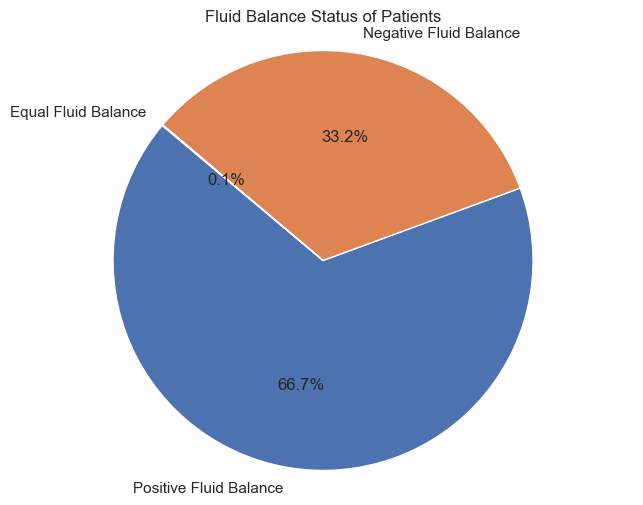

In [48]:
# Initialize a list to store results
fluid_balance_results = []

# Get the unique patient IDs in the DataFrame
unique_patient_ids = df_fluidbal['patient_id'].unique()

# Iterate through each patient_id and perform the analysis
for patient_id in unique_patient_ids:
    # Filter data for the current patient and group by fluid_type, summing fluid_result_amount
    result = df_fluidbal[df_fluidbal['patient_id'] == patient_id].groupby('fluid_type')['fluid_result_amount'].sum().reset_index()

    # Extract the values for 'Intake' and 'Output'
    intake_amount = result[result['fluid_type'] == 'Intake']['fluid_result_amount'].values[0] if 'Intake' in result['fluid_type'].values else None
    output_amount = result[result['fluid_type'] == 'Output']['fluid_result_amount'].values[0] if 'Output' in result['fluid_type'].values else None

    # Compare the two values if they both exist
    if intake_amount is not None and output_amount is not None:
        if intake_amount > output_amount:
            fluid_balance_results.append("Positive Fluid Balance")
        elif output_amount > intake_amount:
            fluid_balance_results.append("Negative Fluid Balance")
        else:
            fluid_balance_results.append( "Equal Fluid Balance")

# Convert results to DataFrame for better visualization
fluid_balance_diff_df = pd.DataFrame(fluid_balance_results, columns=['fluid_balance_status'])

# Count occurrences of each fluid balance status
status_counts = fluid_balance_diff_df['fluid_balance_status'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Fluid Balance Status of Patients')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is a circle.
plt.show()

In [49]:
merged_ref_fluid_df = pd.merge(fluid_balance_df, df_referrals, on='patient_id', how='inner')

### Categorize the patients - percentage of transplantation for each fluid balance status

In [50]:
# Step 3: Group by fluid balance category and transplanted status
# Count the number of True/False transplants in each fluid balance category
grouped = merged_ref_fluid_df.groupby(['fluid_balance_status', 'transplanted']).size().reset_index(name='count')

# Step 4: Calculate the percentage of transplantation within each fluid balance category
total_per_category = grouped.groupby('fluid_balance_status')['count'].transform('sum')
grouped['percentage'] = 100 * grouped['count'] / total_per_category

# Step 5: Display the result
print(grouped)

     fluid_balance_status transplanted  count  percentage
0     Equal Fluid Balance        FALSE      3   42.857143
1     Equal Fluid Balance         TRUE      4   57.142857
2  Negative Fluid Balance        FALSE   1551   40.891115
3  Negative Fluid Balance         TRUE   2242   59.108885
4  Positive Fluid Balance        FALSE   3197   41.982928
5  Positive Fluid Balance         TRUE   4418   58.017072


### Bar Chart to explain the percentage of transplantation for each fluid balance status

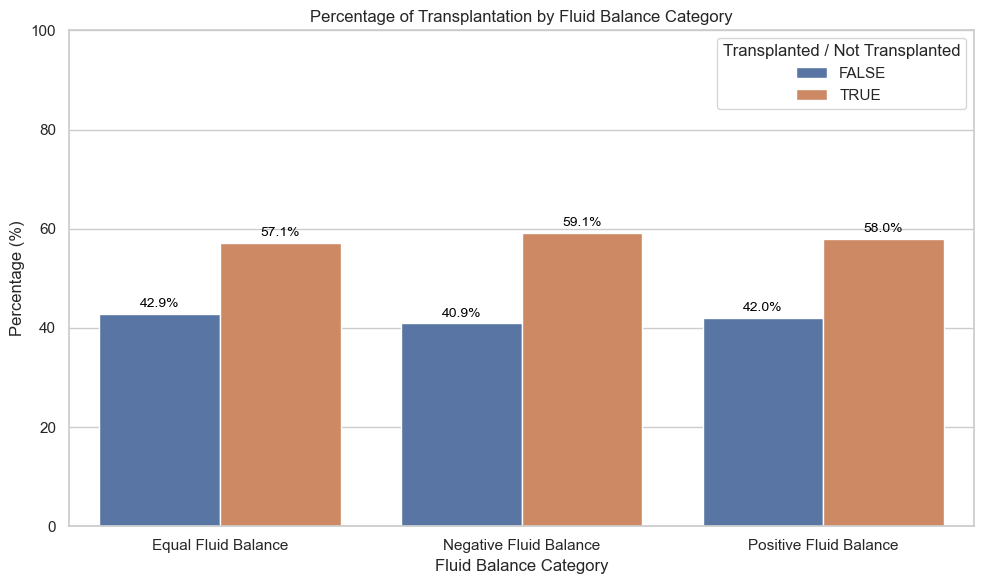

In [51]:
# Assuming you have executed the previous code and have 'grouped' DataFrame

# Step 1: Create a bar plot
plt.figure(figsize=(10, 6))

# Step 2: Use seaborn's barplot to plot the percentage of transplantations
bar_plot = sns.barplot(data=grouped, x='fluid_balance_status', y='percentage', hue='transplanted')

# Step 3: Add titles and labels
plt.title('Percentage of Transplantation by Fluid Balance Category')
plt.xlabel('Fluid Balance Category')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)  # Set the y-axis limits from 0 to 100%

# Step 4: Add percentage labels on the bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.1f}%', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='baseline', 
                      color='black', 
                      fontsize=10, 
                      xytext=(0, 5),  # Offset the text a bit above the bar
                      textcoords='offset points')

# Step 5: Customize the legend
#plt.legend(title='Transplanted', loc='upper right', 
 #          labels=['Not Transplanted', 'Transplanted'], 
  #         frameon=True,  # Add a frame to the legend
   #        shadow=True)  # Add shadow effect to legend

# Step 5: Customize the legend
plt.legend(title='Transplanted / Not Transplanted',  loc='upper right')


# Step 6: Show the plot
plt.tight_layout()
plt.show()

### Percentage of Outcome for Organ Heart per fluid balance status

In [52]:
# Step 3: Group by fluid balance category and outcome_heart
grouped_outcome_heart = merged_ref_fluid_df.groupby(['fluid_balance_status', 'outcome_heart']).size().reset_index(name='count')

# Step 4: Calculate the percentage of each outcome for each fluid balance category
total_per_category_heart = grouped_outcome_heart.groupby('fluid_balance_status')['count'].transform('sum')
grouped_outcome_heart['percentage'] = 100 * grouped_outcome_heart['count'] / total_per_category_heart

# Step 5: Display the result
print(grouped_outcome_heart)

     fluid_balance_status                                  outcome_heart  \
0     Equal Fluid Balance                                   Transplanted   
1  Negative Fluid Balance                         Recovered for Research   
2  Negative Fluid Balance  Recovered for Transplant but not Transplanted   
3  Negative Fluid Balance                                   Transplanted   
4  Positive Fluid Balance                         Recovered for Research   
5  Positive Fluid Balance  Recovered for Transplant but not Transplanted   
6  Positive Fluid Balance                                   Transplanted   

   count  percentage  
0      2  100.000000  
1    200   22.002200  
2      3    0.330033  
3    706   77.667767  
4    341   18.532609  
5      9    0.489130  
6   1490   80.978261  


###  heart transplant outcomes by fluid balance status 

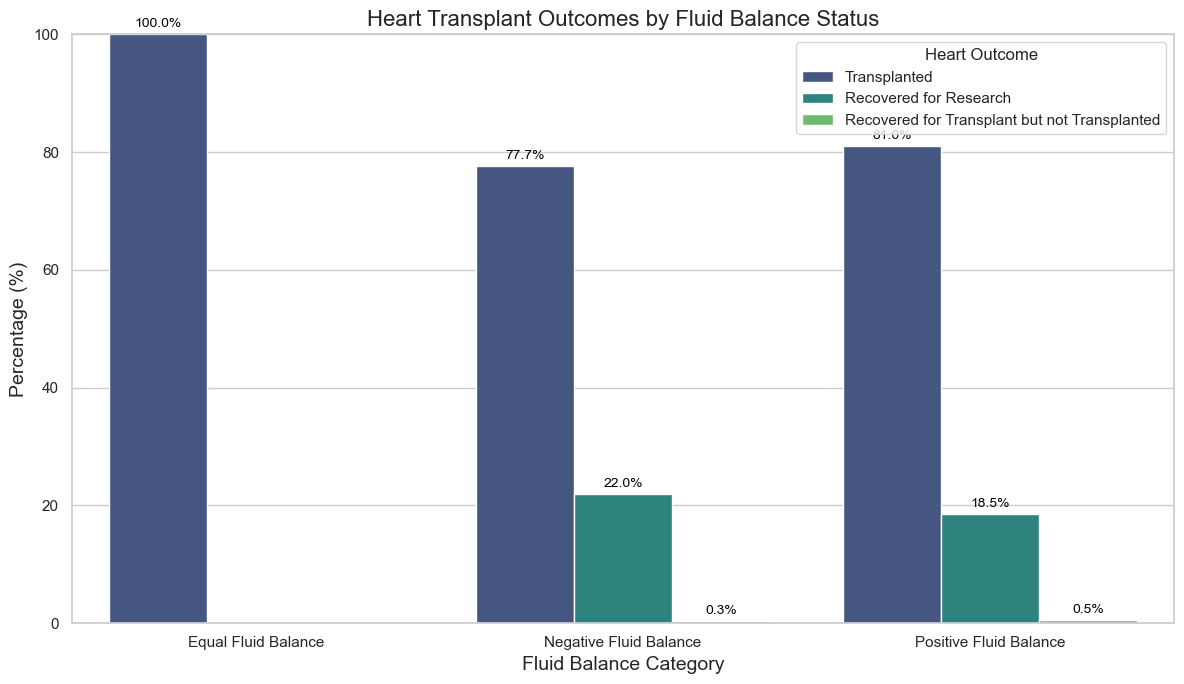

In [53]:
# Step 1: Create a bar plot
plt.figure(figsize=(12, 7))

# Step 2: Use seaborn's barplot to plot the percentage of outcomes by fluid balance category
sns.barplot(data=grouped_outcome_heart, x='fluid_balance_status', y='percentage', hue='outcome_heart', palette='viridis')

# Step 3: Add titles and labels
plt.title('Heart Transplant Outcomes by Fluid Balance Status', fontsize=16)
plt.xlabel('Fluid Balance Category', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.ylim(0, 100)  # Set the y-axis limits from 0 to 100%

# Step 4: Add percentage labels on the bars
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height():.1f}%', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='baseline', 
                 color='black', 
                 fontsize=10, 
                 xytext=(0, 5),  # Offset the text a bit above the bar
                 textcoords='offset points')

# Step 5: Customize the legend
plt.legend(title='Heart Outcome', loc='upper right')

# Step 6: Show the plot
plt.tight_layout()
plt.show()

### Percentage of Outcome for Organ liver per fluid balance status

In [54]:
# Step 3: Group by fluid balance category and outcome_liver
grouped_outcome_liver = merged_ref_fluid_df.groupby(['fluid_balance_status', 'outcome_liver']).size().reset_index(name='count')

# Step 4: Calculate the percentage of each outcome for each fluid balance category
total_per_category_liver = grouped_outcome_liver.groupby('fluid_balance_status')['count'].transform('sum')
grouped_outcome_liver['percentage'] = 100 * grouped_outcome_liver['count'] / total_per_category_liver

# Step 5: Display the result
print(grouped_outcome_liver)

     fluid_balance_status                outcome_liver  count  percentage
0     Equal Fluid Balance                 Transplanted      4  100.000000
1  Negative Fluid Balance  Non-Transplanted Recoveries     85    4.207921
2  Negative Fluid Balance       Recovered for Research    118    5.841584
3  Negative Fluid Balance                 Transplanted   1817   89.950495
4  Positive Fluid Balance  Non-Transplanted Recoveries    141    3.669964
5  Positive Fluid Balance       Recovered for Research    267    6.949505
6  Positive Fluid Balance                 Transplanted   3434   89.380531


### Percentage of Outcome for Organ liver per fluid balance status

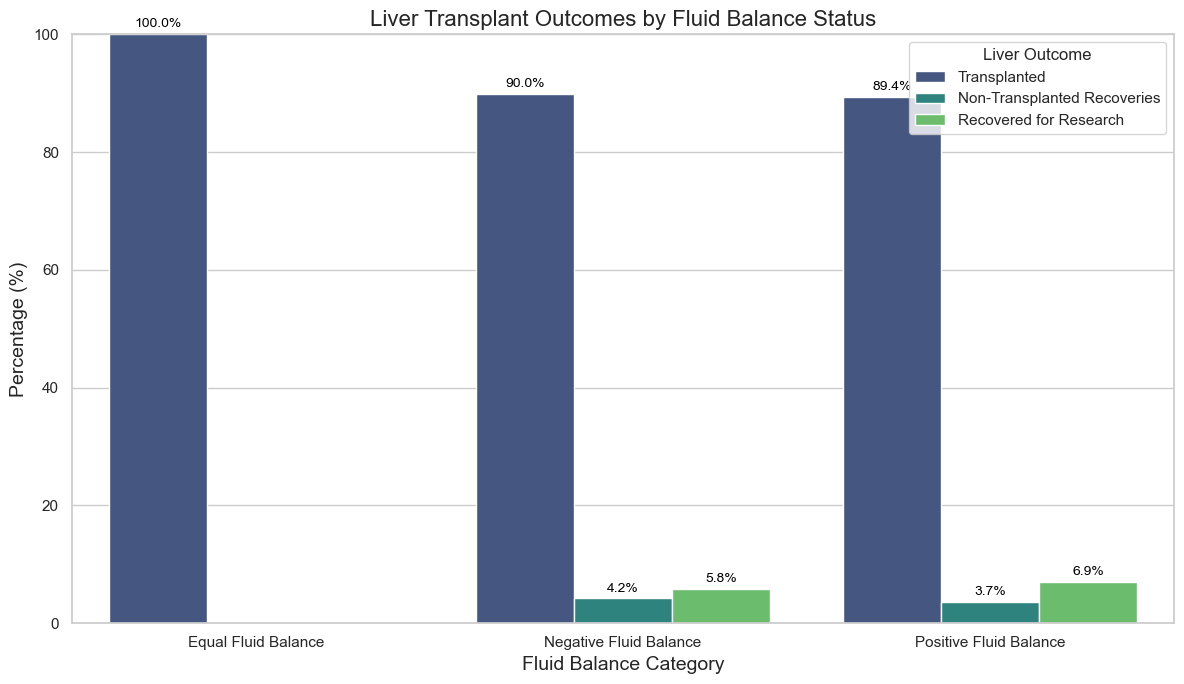

In [55]:
# Step 1: Create a bar plot
plt.figure(figsize=(12, 7))

# Step 2: Use seaborn's barplot to plot the percentage of outcomes by fluid balance category
sns.barplot(data=grouped_outcome_liver, x='fluid_balance_status', y='percentage', hue='outcome_liver', palette='viridis')

# Step 3: Add titles and labels
plt.title('Liver Transplant Outcomes by Fluid Balance Status', fontsize=16)
plt.xlabel('Fluid Balance Category', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.ylim(0, 100)  # Set the y-axis limits from 0 to 100%

# Step 4: Add percentage labels on the bars
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height():.1f}%', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='baseline', 
                 color='black', 
                 fontsize=10, 
                 xytext=(0, 5),  # Offset the text a bit above the bar
                 textcoords='offset points')

# Step 5: Customize the legend
plt.legend(title='Liver Outcome', loc='upper right')

# Step 6: Show the plot
plt.tight_layout()
plt.show()

## Percentage of Outcome for Organ left kidney per fluid balance status

In [56]:
# Step 3: Group by fluid balance category and outcome_kidney left
grouped_outcome_kidney_left = merged_ref_fluid_df.groupby(['fluid_balance_status', 'outcome_kidney_left']).size().reset_index(name='count')

# Step 4: Calculate the percentage of each outcome for each fluid balance category
total_per_category_kidney_left = grouped_outcome_kidney_left.groupby('fluid_balance_status')['count'].transform('sum')
grouped_outcome_kidney_left['percentage'] = 100 * grouped_outcome_kidney_left['count'] / total_per_category_kidney_left

# Step 5: Display the result
print(grouped_outcome_kidney_left)


     fluid_balance_status          outcome_kidney_left  count  percentage
0     Equal Fluid Balance  Non-Transplanted Recoveries      3   75.000000
1     Equal Fluid Balance                 Transplanted      1   25.000000
2  Negative Fluid Balance  Non-Transplanted Recoveries    347   15.518784
3  Negative Fluid Balance       Recovered for Research    116    5.187835
4  Negative Fluid Balance                 Transplanted   1773   79.293381
5  Positive Fluid Balance  Non-Transplanted Recoveries    626   14.764151
6  Positive Fluid Balance       Recovered for Research    202    4.764151
7  Positive Fluid Balance                 Transplanted   3412   80.471698


### Percentage of Outcome for Organ left kidney per fluid balance status

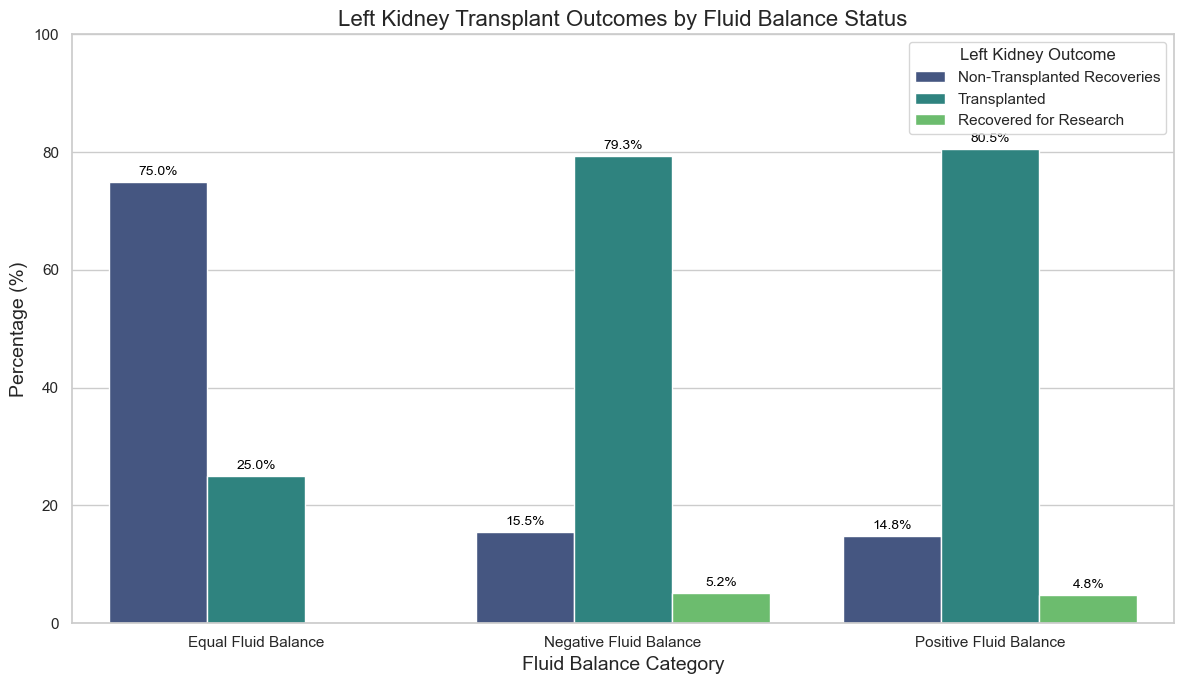

In [57]:
# Step 1: Create a bar plot
plt.figure(figsize=(12, 7))

# Step 2: Use seaborn's barplot to plot the percentage of outcomes by fluid balance category
sns.barplot(data=grouped_outcome_kidney_left, x='fluid_balance_status', y='percentage', hue='outcome_kidney_left', palette='viridis')

# Step 3: Add titles and labels
plt.title('Left Kidney Transplant Outcomes by Fluid Balance Status', fontsize=16)
plt.xlabel('Fluid Balance Category', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.ylim(0, 100)  # Set the y-axis limits from 0 to 100%

# Step 4: Add percentage labels on the bars
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height():.1f}%', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='baseline', 
                 color='black', 
                 fontsize=10, 
                 xytext=(0, 5),  # Offset the text a bit above the bar
                 textcoords='offset points')

# Step 5: Customize the legend
plt.legend(title='Left Kidney Outcome', loc='upper right')

# Step 6: Show the plot
plt.tight_layout()
plt.show()

### Percentage of Outcome for Organ Right kidney per fluid balance status

In [58]:
# Step 3: Group by fluid balance category and outcome_kidney right
grouped_outcome_kidney_right = merged_ref_fluid_df.groupby(['fluid_balance_status', 'outcome_kidney_right']).size().reset_index(name='count')

# Step 4: Calculate the percentage of each outcome for each fluid balance category
total_per_category_kidney_right = grouped_outcome_kidney_right.groupby('fluid_balance_status')['count'].transform('sum')
grouped_outcome_kidney_right['percentage'] = 100 * grouped_outcome_kidney_right['count'] / total_per_category_kidney_right

# Step 5: Display the result
print(grouped_outcome_kidney_right)

     fluid_balance_status         outcome_kidney_right  count  percentage
0     Equal Fluid Balance  Non-Transplanted Recoveries      2   50.000000
1     Equal Fluid Balance                 Transplanted      2   50.000000
2  Negative Fluid Balance  Non-Transplanted Recoveries    363   16.190901
3  Negative Fluid Balance       Recovered for Research    118    5.263158
4  Negative Fluid Balance                 Transplanted   1761   78.545941
5  Positive Fluid Balance  Non-Transplanted Recoveries    645   15.201508
6  Positive Fluid Balance       Recovered for Research    203    4.784351
7  Positive Fluid Balance                 Transplanted   3395   80.014141


### Percentage of Outcome for Organ Right kidney per fluid balance status

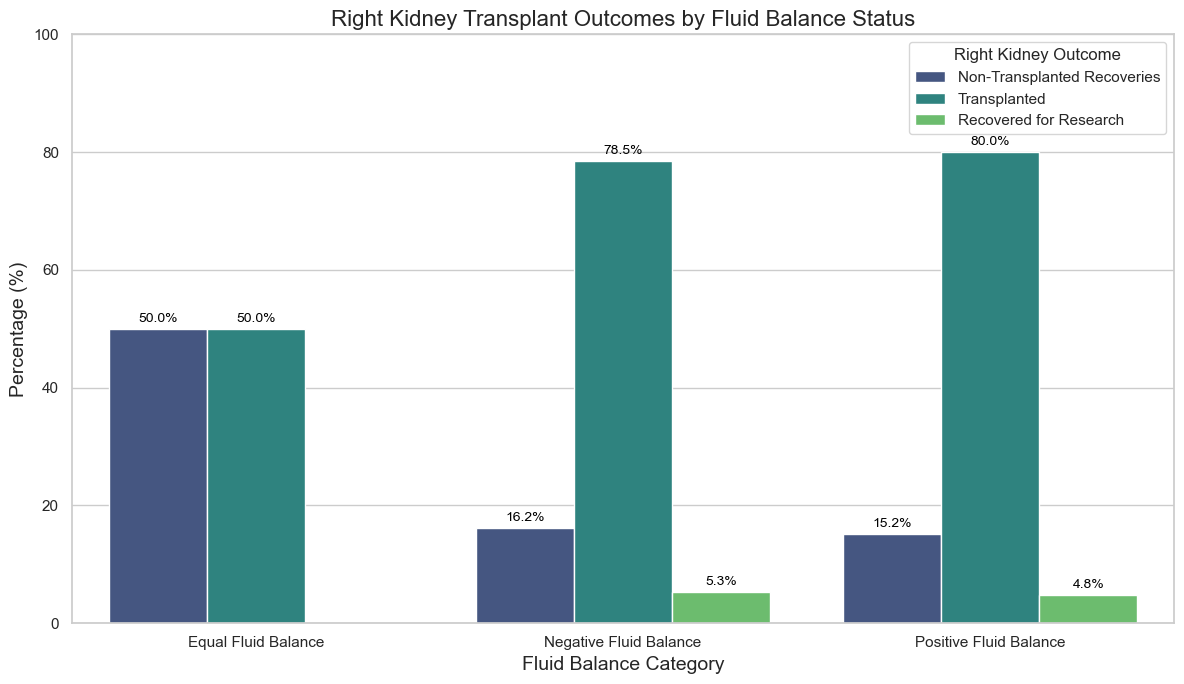

In [59]:
# Step 1: Create a bar plot
plt.figure(figsize=(12, 7))

# Step 2: Use seaborn's barplot to plot the percentage of outcomes by fluid balance category
sns.barplot(data=grouped_outcome_kidney_right, x='fluid_balance_status', y='percentage', hue='outcome_kidney_right', palette='viridis')

# Step 3: Add titles and labels
plt.title('Right Kidney Transplant Outcomes by Fluid Balance Status', fontsize=16)
plt.xlabel('Fluid Balance Category', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.ylim(0, 100)  # Set the y-axis limits from 0 to 100%

# Step 4: Add percentage labels on the bars
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height():.1f}%', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='baseline', 
                 color='black', 
                 fontsize=10, 
                 xytext=(0, 5),  # Offset the text a bit above the bar
                 textcoords='offset points')

# Step 5: Customize the legend
plt.legend(title='Right Kidney Outcome', loc='upper right')

# Step 6: Show the plot
plt.tight_layout()
plt.show()

### Percentage of Outcome for Organ Right lung per fluid balance status

In [60]:
# Step 3: Group by fluid balance category and outcome_lung right
grouped_outcome_lung_right = merged_ref_fluid_df.groupby(['fluid_balance_status', 'outcome_lung_right']).size().reset_index(name='count')

# Step 4: Calculate the percentage of each outcome for each fluid balance category
total_per_category_lung_right = grouped_outcome_lung_right.groupby('fluid_balance_status')['count'].transform('sum')
grouped_outcome_lung_right['percentage'] = 100 * grouped_outcome_lung_right['count'] / total_per_category_lung_right

# Step 5: Display the result
print(grouped_outcome_lung_right)

     fluid_balance_status           outcome_lung_right  count  percentage
0     Equal Fluid Balance       Recovered for Research      1   33.333333
1     Equal Fluid Balance                 Transplanted      2   66.666667
2  Negative Fluid Balance  Non-Transplanted Recoveries     20    2.481390
3  Negative Fluid Balance       Recovered for Research    146   18.114144
4  Negative Fluid Balance                 Transplanted    640   79.404467
5  Positive Fluid Balance  Non-Transplanted Recoveries     42    3.125000
6  Positive Fluid Balance       Recovered for Research    308   22.916667
7  Positive Fluid Balance                 Transplanted    994   73.958333


### Percentage of Outcome for Organ Left lung per fluid balance status

In [61]:
# Step 3: Group by fluid balance category and outcome_lung left
grouped_outcome_lung_left = merged_ref_fluid_df.groupby(['fluid_balance_status', 'outcome_lung_left']).size().reset_index(name='count')

# Step 4: Calculate the percentage of each outcome for each fluid balance category
total_per_category_lung_left = grouped_outcome_lung_left.groupby('fluid_balance_status')['count'].transform('sum')
grouped_outcome_lung_left['percentage'] = 100 * grouped_outcome_lung_left['count'] / total_per_category_lung_left

# Step 5: Display the result
print(grouped_outcome_lung_left)


     fluid_balance_status            outcome_lung_left  count  percentage
0     Equal Fluid Balance                 Transplanted      1  100.000000
1  Negative Fluid Balance  Non-Transplanted Recoveries     21    2.685422
2  Negative Fluid Balance       Recovered for Research    122   15.601023
3  Negative Fluid Balance                 Transplanted    639   81.713555
4  Positive Fluid Balance  Non-Transplanted Recoveries     46    3.422619
5  Positive Fluid Balance       Recovered for Research    285   21.205357
6  Positive Fluid Balance                 Transplanted   1013   75.372024


### Percentage of Outcome for Organ intestine per fluid balance status

In [62]:
# Step 3: Group by fluid balance category and outcome_intestine
grouped_outcome_intestine = merged_ref_fluid_df.groupby(['fluid_balance_status', 'outcome_intestine']).size().reset_index(name='count')

# Step 4: Calculate the percentage of each outcome for each fluid balance category
total_per_category_intestine = grouped_outcome_intestine.groupby('fluid_balance_status')['count'].transform('sum')
grouped_outcome_intestine['percentage'] = 100 * grouped_outcome_intestine['count'] / total_per_category_intestine

# Step 5: Display the result
print(grouped_outcome_intestine)

     fluid_balance_status            outcome_intestine  count  percentage
0  Negative Fluid Balance  Non-Transplanted Recoveries      2    2.272727
1  Negative Fluid Balance       Recovered for Research     65   73.863636
2  Negative Fluid Balance                 Transplanted     21   23.863636
3  Positive Fluid Balance  Non-Transplanted Recoveries      2    1.183432
4  Positive Fluid Balance       Recovered for Research    112   66.272189
5  Positive Fluid Balance                 Transplanted     55   32.544379


### Percentage of Outcome for Organ intestine per fluid balance status

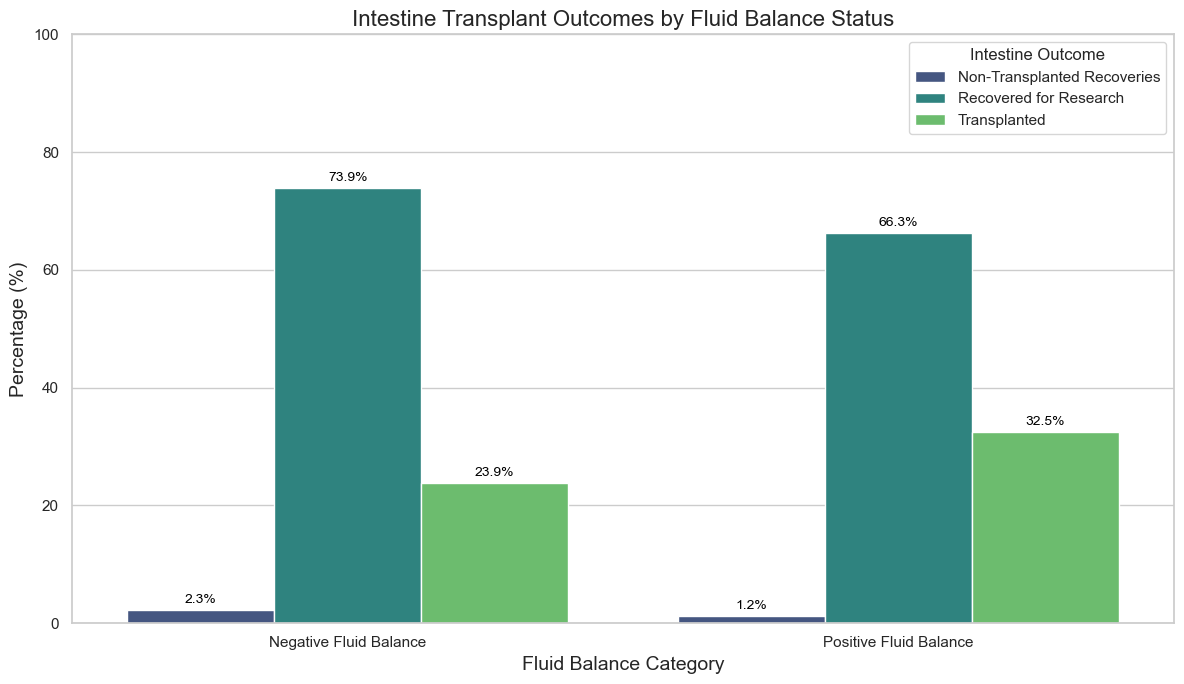

In [63]:
# Step 1: Create a bar plot
plt.figure(figsize=(12, 7))

# Step 2: Use seaborn's barplot to plot the percentage of outcomes by fluid balance category
sns.barplot(data=grouped_outcome_intestine, x='fluid_balance_status', y='percentage', hue='outcome_intestine', palette='viridis')

# Step 3: Add titles and labels
plt.title('Intestine Transplant Outcomes by Fluid Balance Status', fontsize=16)
plt.xlabel('Fluid Balance Category', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.ylim(0, 100)  # Set the y-axis limits from 0 to 100%

# Step 4: Add percentage labels on the bars
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height():.1f}%', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='baseline', 
                 color='black', 
                 fontsize=10, 
                 xytext=(0, 5),  # Offset the text a bit above the bar
                 textcoords='offset points')

# Step 5: Customize the legend
plt.legend(title='Intestine Outcome', loc='upper right')

# Step 6: Show the plot
plt.tight_layout()
plt.show()

### Age and Gender - Transplanted Status

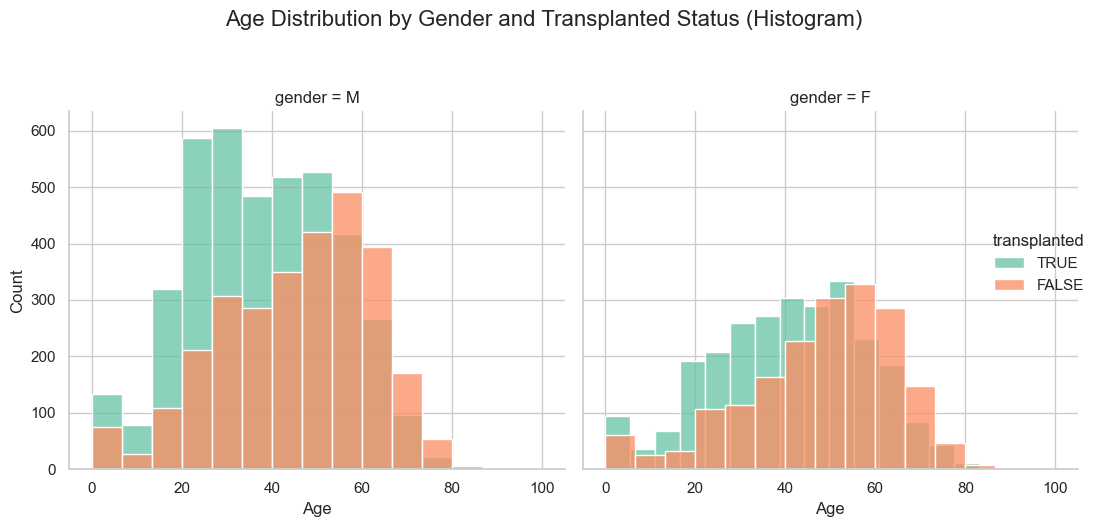

In [64]:
# Facet grid with histograms for age distribution by gender and transplanted status
g = sns.FacetGrid(merged_ref_fluid_df, col='gender', hue='transplanted', palette='Set2', height=5, aspect=1)
g.map(sns.histplot, 'age', kde=False, bins=15)

# Add titles and legends
g.add_legend()
g.set_axis_labels('Age', 'Count')
g.fig.suptitle('Age Distribution by Gender and Transplanted Status (Histogram)', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

### Age and Gender - Transplanted Status for each Fluid Balance Status

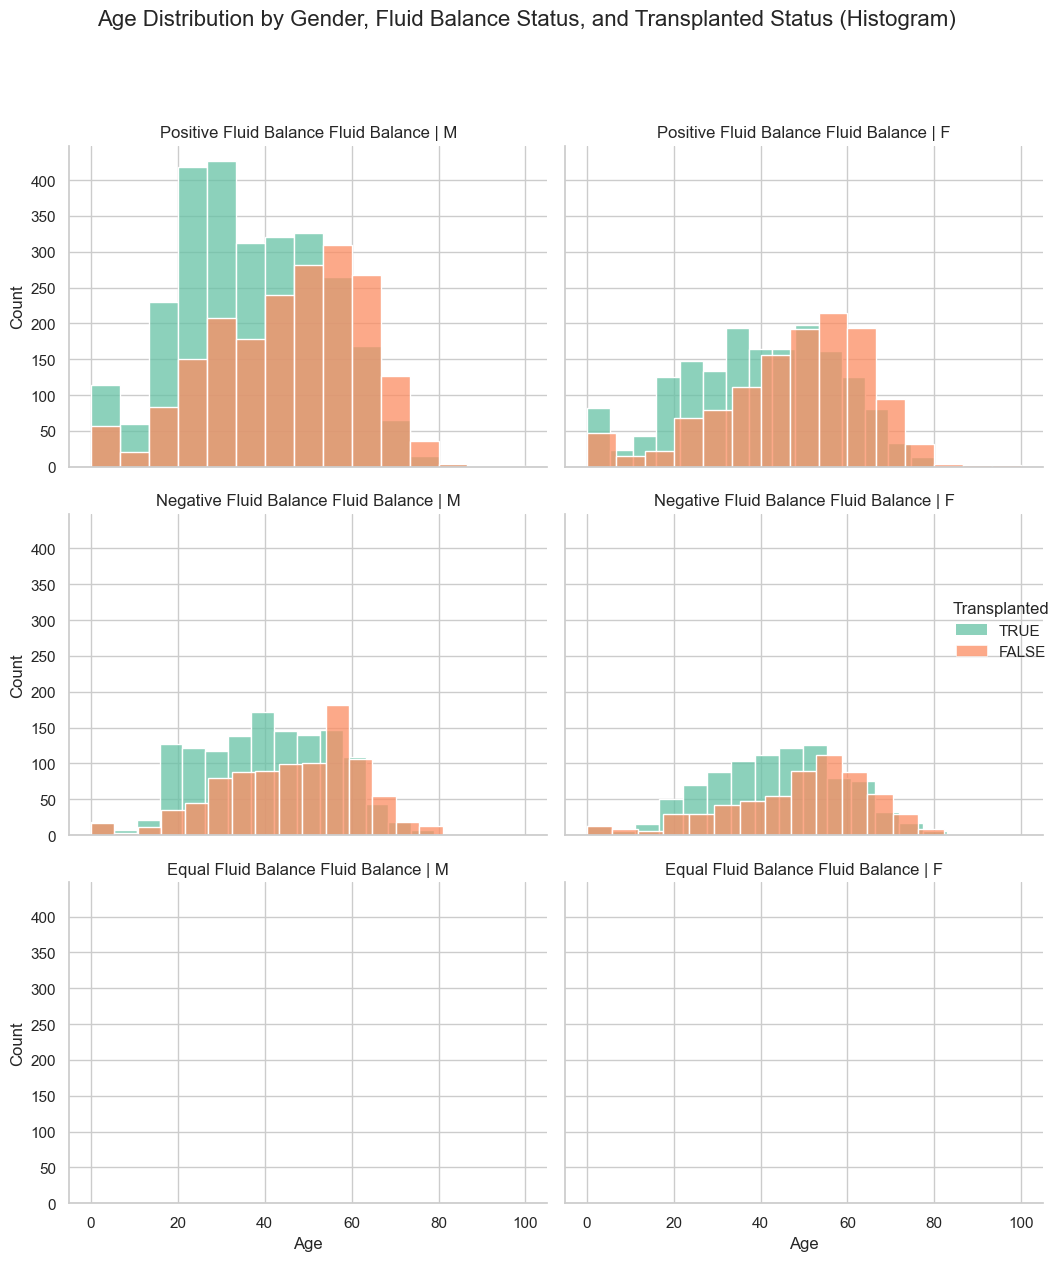

In [65]:

# Facet grid with histograms for age distribution by gender, fluid balance status, and transplanted status
g = sns.FacetGrid(merged_ref_fluid_df, col='gender', row='fluid_balance_status', hue='transplanted', palette='Set2', height=4, aspect=1.2)

# Plot histograms for age with separate grids for gender and fluid balance status, with hue for transplanted status
g.map(sns.histplot, 'age', kde=False, bins=15)

# Add titles and legends
g.add_legend(title="Transplanted")
g.set_axis_labels('Age', 'Count')
g.set_titles(row_template="{row_name} Fluid Balance", col_template="{col_name}")
g.fig.suptitle('Age Distribution by Gender, Fluid Balance Status, and Transplanted Status (Histogram)', fontsize=16, y=1.05)

# Adjust layout
plt.tight_layout()
plt.show()

### Statistics for the age, gender distribution for each fluid balance status along with transplanted %

In [66]:
# Create age bins for categorization (you can modify the bins as needed)
age_bins = [0, 20, 40, 60, 80, 100]
age_labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
merged_ref_fluid_df['age_group'] = pd.cut(merged_ref_fluid_df['age'], bins=age_bins, labels=age_labels)

# Group data by gender, fluid balance status, and age group
grouped_df = merged_ref_fluid_df.groupby(['gender', 'fluid_balance_status', 'age_group', 'transplanted']).size().unstack(fill_value=0)

# Calculate percentages within each gender and fluid balance category
grouped_df['Total'] = grouped_df['TRUE'] + grouped_df['FALSE']
grouped_df['Transplant_True_%'] = (grouped_df['TRUE'] / grouped_df['Total']) * 100
grouped_df['Transplant_False_%'] = (grouped_df['FALSE'] / grouped_df['Total']) * 100

# Display the result
print(grouped_df[['Transplant_True_%', 'Transplant_False_%']])

transplanted                             Transplant_True_%  Transplant_False_%
gender fluid_balance_status   age_group                                       
F      Equal Fluid Balance    0-20                     NaN                 NaN
                              21-40             100.000000            0.000000
                              41-60               0.000000          100.000000
                              61-80               0.000000          100.000000
                              81-100                   NaN                 NaN
       Negative Fluid Balance 0-20               66.315789           33.684211
                              21-40              70.251716           29.748284
                              41-60              57.567185           42.432815
                              61-80              47.058824           52.941176
                              81-100             50.000000           50.000000
       Positive Fluid Balance 0-20               74.

### Percentage of transplants per fluid type

In [67]:

# Create age bins for categorization (you can modify the bins as needed)
age_bins = [0, 20, 40, 60, 80, 100]
age_labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
merged_ref_fluid_df['age_group'] = pd.cut(merged_ref_fluid_df['age'], bins=age_bins, labels=age_labels)

# Group data by gender, fluid balance status, and age group
grouped_df = merged_ref_fluid_df.groupby(['gender', 'fluid_balance_status', 'age_group', 'transplanted']).size().unstack(fill_value=0)

# Calculate percentages within each gender and fluid balance category
grouped_df['Total'] = grouped_df['TRUE'] + grouped_df['FALSE']
grouped_df['Transplant_True_%'] = (grouped_df['TRUE'] / grouped_df['Total']) * 100
grouped_df['Transplant_False_%'] = (grouped_df['FALSE'] / grouped_df['Total']) * 100

# Display the result
print(grouped_df[['Transplant_True_%', 'Transplant_False_%']])

transplanted                             Transplant_True_%  Transplant_False_%
gender fluid_balance_status   age_group                                       
F      Equal Fluid Balance    0-20                     NaN                 NaN
                              21-40             100.000000            0.000000
                              41-60               0.000000          100.000000
                              61-80               0.000000          100.000000
                              81-100                   NaN                 NaN
       Negative Fluid Balance 0-20               66.315789           33.684211
                              21-40              70.251716           29.748284
                              41-60              57.567185           42.432815
                              61-80              47.058824           52.941176
                              81-100             50.000000           50.000000
       Positive Fluid Balance 0-20               74.

### Percentage of transplants per fluid type

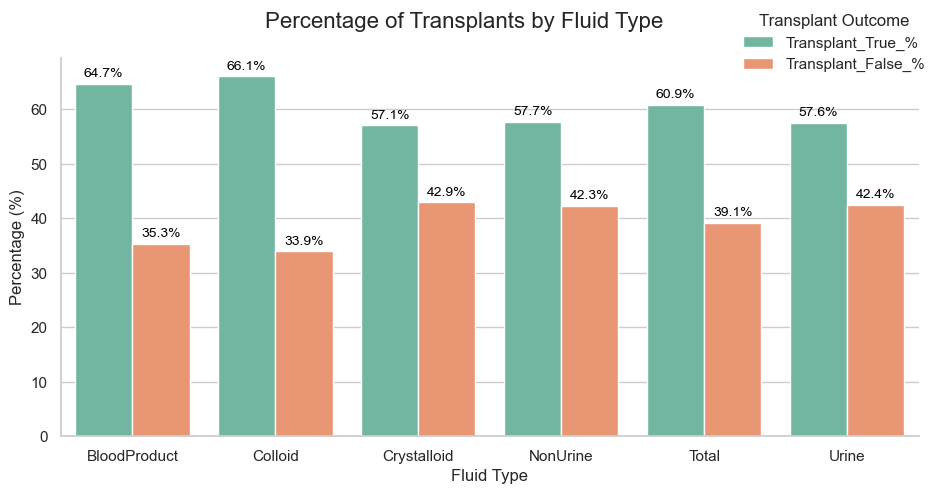

In [68]:
# Dataset merge
merged_ref_fluid_full = pd.merge(df_fluidbal, df_referrals, on='patient_id', how='inner')

# Group by fluid type and transplant status, calculate counts
fluid_transplant_group = merged_ref_fluid_full.groupby(['fluid_name', 'transplanted']).size().unstack(fill_value=0)

# Group by fluid type and transplant status, calculate counts
fluid_transplant_group = merged_ref_fluid_full.groupby(['fluid_name', 'transplanted']).size().unstack(fill_value=0)

# Calculate the percentage of successful and unsuccessful transplants
fluid_transplant_group['Total'] = fluid_transplant_group['TRUE'] + fluid_transplant_group['FALSE']
fluid_transplant_group['Transplant_True_%'] = (fluid_transplant_group['TRUE'] / fluid_transplant_group['Total']) * 100
fluid_transplant_group['Transplant_False_%'] = (fluid_transplant_group['FALSE'] / fluid_transplant_group['Total']) * 100

# Melt the dataframe for easier plotting with seaborn
fluid_transplant_group_melted = fluid_transplant_group[['Transplant_True_%', 'Transplant_False_%']].reset_index().melt(id_vars='fluid_name', 
                                var_name='Transplanted_Status', value_name='Percentage')

# Create the categorical plot using percentages
sns.set(style="whitegrid")
g = sns.catplot(
    x="fluid_name", 
    y="Percentage", 
    hue="Transplanted_Status", 
    data=fluid_transplant_group_melted, 
    kind="bar", 
    palette="Set2", 
    height=5, 
    aspect=1.5, legend=False
)

# Modify the labels
g.set_axis_labels("Fluid Type", "Percentage (%)")
g.fig.suptitle('Percentage of Transplants by Fluid Type', fontsize=16)
g.add_legend(title="Transplant Outcome", loc='upper right')


# Step 4: Add percentage labels on the bars
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height():.1f}%', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='baseline', 
                 color='black', 
                 fontsize=10, 
                 xytext=(0, 5),  # Offset the text a bit above the bar
                 textcoords='offset points')


# Show plot
plt.tight_layout()
plt.show()

### Percentage of Transplantation by brain death status

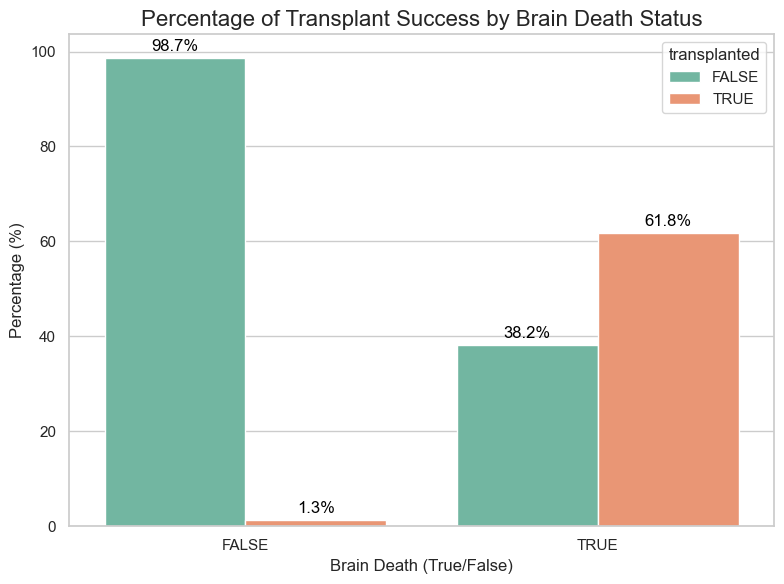

In [69]:
# Grouping the data by brain death and transplanted status
grouped_df = df_referrals.groupby(['brain_death', 'transplanted']).size().reset_index(name='count')

# Calculate total counts for each brain death status (True/False)
total_counts = df_referrals.groupby('brain_death').size().reset_index(name='total')

# Merge the total counts back into the grouped DataFrame
grouped_df = pd.merge(grouped_df, total_counts, on='brain_death')

# Calculate the percentage for each combination of brain_death and transplanted status
grouped_df['percentage'] = (grouped_df['count'] / grouped_df['total']) * 100

# Plot the percentage distribution as a bar chart
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(
    x='brain_death', 
    y='percentage', 
    hue='transplanted', 
    data=grouped_df, 
    palette='Set2'
)

# Adding titles and labels
bar_plot.set_title('Percentage of Transplant Success by Brain Death Status', fontsize=16)
bar_plot.set_xlabel('Brain Death (True/False)', fontsize=12)
bar_plot.set_ylabel('Percentage (%)', fontsize=12)

# Display percentage values on the bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.1f}%', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'baseline', fontsize=12, color='black', xytext=(0, 5),
                      textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()

#### Actual Transplants in Referrals Table

In [70]:
df_referrals_set1 = df_referrals.copy()
df_referrals_set1

# Filter for transplanted = 'TRUE'
filtered_df_set1 = df_referrals_set1[df_referrals_set1['transplanted'] == 'TRUE']

filtered_df_set1

# Group by 'opo' and 'transplanted' and count
result_final_set1 = filtered_df_set1.groupby(['referral_year','opo', 'transplanted']).size().reset_index(name='Count')

#result_final_set1

### Getting ready with Calc Death file for merging with Referrals Table

In [71]:
# Merge the two dataframes on 'referral_year' and 'opo
df_calcdeath_set1 = df_calcdeath.copy()
df_calcdeath_set1
df_calcdeath_set1.rename(columns={'year': 'referral_year'}, inplace=True)
#df_calcdeath_set1

#### Getting ready with dataset for finding discrepencies of transplantation done in each OPO

In [72]:
df_referrals_set1 = df_referrals.copy()
#display file
df_referrals_set1

# Filter for transplanted = 'TRUE'
filtered_df_set1 = df_referrals_set1[df_referrals_set1['transplanted'] == 'TRUE']
#display file
filtered_df_set1

# Group by 'opo' and 'transplanted' and count
result_final_set1 = filtered_df_set1.groupby(['referral_year','opo', 'transplanted']).size().reset_index(name='Count')
#display file
result_final_set1

# Merge the two dataframes on 'referral_year' and 'opo
df_calcdeath_set1 = df_calcdeath.copy()
#display file
df_calcdeath_set1

df_calcdeath_set1.rename(columns={'year': 'referral_year'}, inplace=True)
df_calcdeath_set1

df_merged_set2 = pd.merge(result_final_set1, df_calcdeath_set1, on=['referral_year', 'opo'])
#display file
#df_merged_set2

#### # Percentage difference between Expected transplants and Actual Transplants for each OPO for each year

In [73]:
df_percent = df_merged_set2.copy()

df_percent['Count'] = df_percent['Count'].astype(float)
df_percent['calc_deaths'] = df_percent['calc_deaths'].astype(float)

# Calculate the percentage difference between calc_deaths and Count
df_percent['Percentage_Difference'] =  (((df_percent['calc_deaths'] - df_percent['Count']) / df_percent['calc_deaths']) * 100)

# Round the percentage difference to 2 decimal places
df_percent['Percentage_Difference'] = df_percent['Percentage_Difference'].round(2)

# Reset index for better readability
df_reset = df_percent.reset_index()

# Display the result
print(df_reset[['referral_year', 'opo', 'Count', 'calc_deaths', 'Percentage_Difference']])

    referral_year   opo  Count  calc_deaths  Percentage_Difference
0            2015  OPO1  338.0       2852.7                  88.15
1            2015  OPO3   63.0        675.6                  90.67
2            2015  OPO4  282.0       3074.6                  90.83
3            2015  OPO5  184.0       1515.3                  87.86
4            2015  OPO6  112.0       1252.0                  91.05
5            2016  OPO1  361.0       2954.1                  87.78
6            2016  OPO3   49.0        656.3                  92.53
7            2016  OPO4  276.0       3146.3                  91.23
8            2016  OPO5  178.0       1534.3                  88.40
9            2016  OPO6  153.0       1263.0                  87.89
10           2017  OPO1  371.0       3112.3                  88.08
11           2017  OPO3   61.0        730.3                  91.65
12           2017  OPO4  303.0       3163.3                  90.42
13           2017  OPO5  214.0       1668.2                  8

#### Percentage difference between Expected transplants and Actual Transplants for each OPO 

In [74]:
# Group by 'opo' to exclude year and calculate the sum of 'Count' and 'calc_deaths'
df_merged_set3 = df_merged_set2.copy()

df_merged_set3['Count'] = df_merged_set3['Count'].astype(float)
df_merged_set3['calc_deaths'] = df_merged_set3['calc_deaths'].astype(float)

df_grouped_only_opo = df_merged_set3.groupby('opo').agg({
    'Count': 'sum',
    'calc_deaths': 'sum'
}).reset_index()

# Calculate the percentage difference for each OPO
df_grouped_only_opo['Percentage_Difference'] = ((df_grouped_only_opo['calc_deaths'] - df_grouped_only_opo['Count']) / df_grouped_only_opo['calc_deaths']) * 100

# Round the percentage difference to 2 decimal places
df_grouped_only_opo['Percentage_Difference'] = df_grouped_only_opo['Percentage_Difference'].round(2)


# Display the result
print(df_grouped_only_opo[['opo', 'Count', 'calc_deaths', 'Percentage_Difference']])

    opo   Count  calc_deaths  Percentage_Difference
0  OPO1  2202.0      18323.4                  87.98
1  OPO2   611.0       5090.0                  88.00
2  OPO3   443.0       4319.8                  89.74
3  OPO4  1936.0      18790.7                  89.70
4  OPO5  1277.0       9490.5                  86.54
5  OPO6   985.0       8077.0                  87.80


### Percentage difference between Expected transplants and Actual Transplants for each OPO 

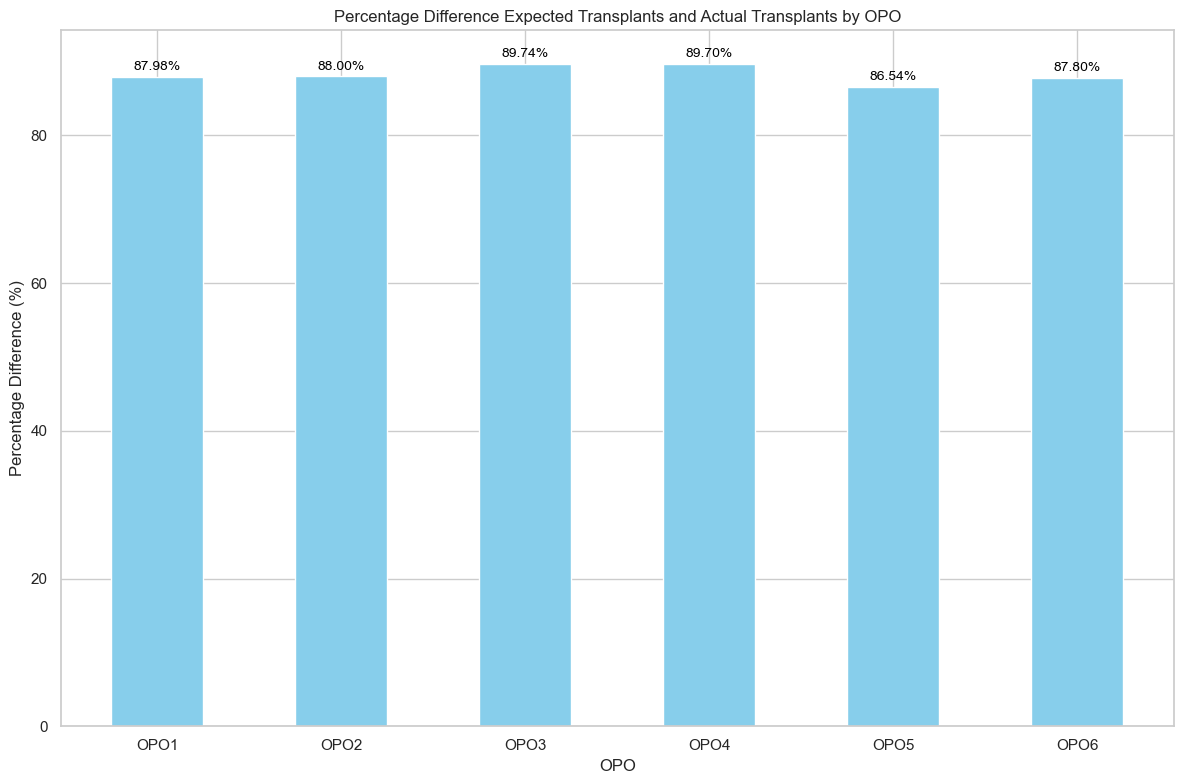

In [75]:
# Create a bar chart for percentage differences
fig, ax = plt.subplots(figsize=(12, 8))

# Define bar width
bar_width = 0.5
index = np.arange(len(df_grouped_only_opo))  # The x locations for the groups (OPOs)

# Plot bars for the percentage differences
ax.bar(index, df_grouped_only_opo['Percentage_Difference'], bar_width, label='Percentage Difference', color='skyblue')

# Add labels, title, and custom ticks on the x-axis
ax.set_xlabel('OPO')
ax.set_ylabel('Percentage Difference (%)')
ax.set_title('Percentage Difference Expected Transplants and Actual Transplants by OPO')
ax.set_xticks(index)
ax.set_xticklabels(df_grouped_only_opo['opo'])

# Annotate each bar with the percentage difference value
for i, v in enumerate(df_grouped_only_opo['Percentage_Difference']):
    ax.text(i, v + 0.5, f'{v:.2f}%', ha='center', va='bottom', fontsize=10, color='black')

# Display the chart
plt.tight_layout()
plt.show()

### Percentage Difference Between Expected Transplant and Actual Transplant by OPO - 2016 

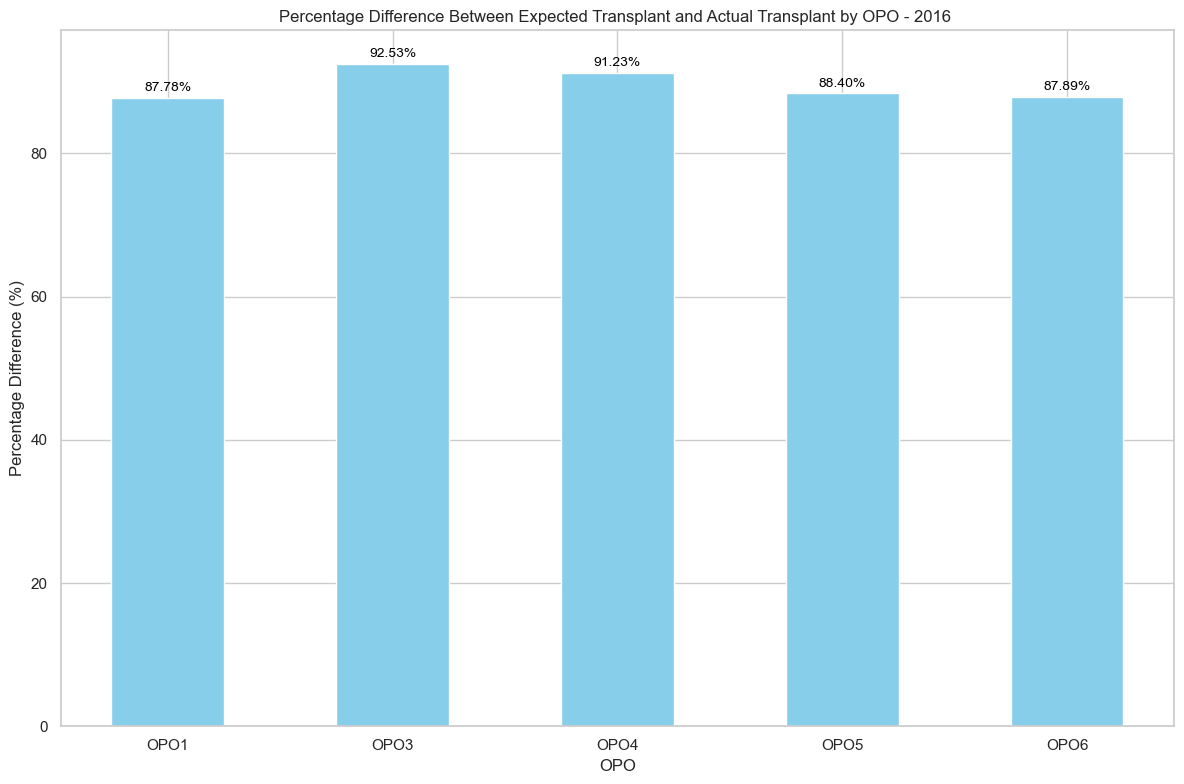

In [76]:
# copy dataset for working

df_reset_only2016 =df_reset.copy()

# Filter the dataset for the year 2016
df_reset_only2016 = df_reset_only2016[df_reset_only2016['referral_year'] == 2016]

# Create a bar chart for percentage differences
fig, ax = plt.subplots(figsize=(12, 8))

# Define bar width
bar_width = 0.5
index = np.arange(len(df_reset_only2016))  # The x locations for the groups (OPOs)

# Plot bars for the percentage differences
ax.bar(index, df_reset_only2016['Percentage_Difference'], bar_width, label='Percentage Difference', color='skyblue')

# Add labels, title, and custom ticks on the x-axis
ax.set_xlabel('OPO')
ax.set_ylabel('Percentage Difference (%)')
ax.set_title('Percentage Difference Between Expected Transplant and Actual Transplant by OPO - 2016 ')
ax.set_xticks(index)
ax.set_xticklabels(df_reset_only2016['opo'])

# Annotate each bar with the percentage difference value
for i, v in enumerate(df_reset_only2016['Percentage_Difference']):
    ax.text(i, v + 0.5, f'{v:.2f}%', ha='center', va='bottom', fontsize=10, color='black')

# Display the chart
plt.tight_layout()
plt.show()

## SEROLOGY_EVENTS

## Distribution of Serology Categories

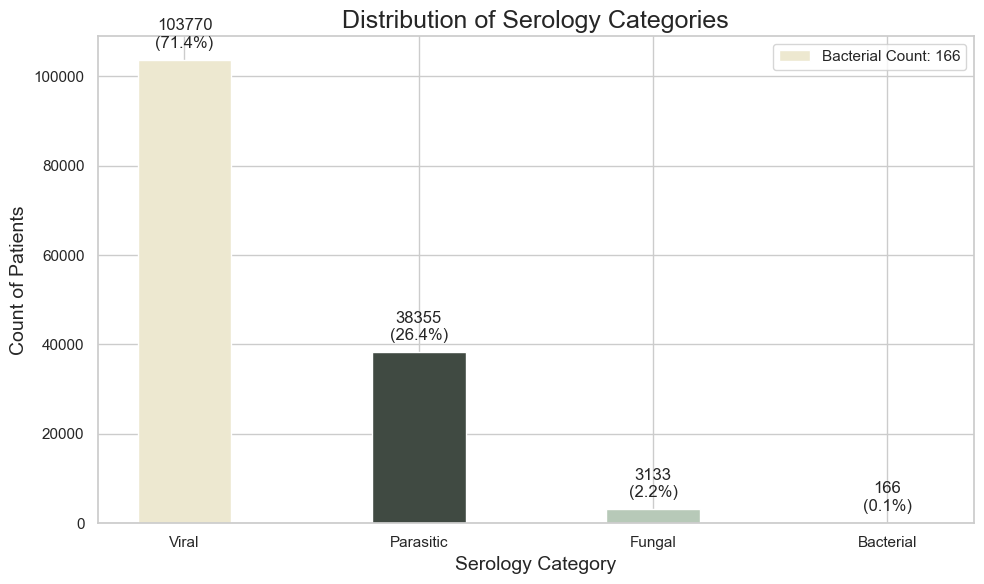

In [77]:
# Data for the bar chart
serology_categories = ['Viral', 'Parasitic', 'Fungal', 'Bacterial']
serology_counts = [103770, 38355, 3133, 166]

# Calculate total count for percentage calculation
total_count = sum(serology_counts)

# Create the bar chart with increased figure size
fig, ax = plt.subplots(figsize=(10, 6))  # Increased size

bar_width = 0.4
bars = ax.bar(serology_categories, serology_counts, width=bar_width, color=['#EDE8D0', '#404A42', '#B7C9B8', '#A3C1AD'])

# Add titles and labels
ax.set_title('Distribution of Serology Categories', fontsize=18)  # Changed title
ax.set_xlabel('Serology Category', fontsize=14)
ax.set_ylabel('Count of Patients', fontsize=14)

# Add data labels on top of bars with counts and percentages
for bar in bars:
    yval = bar.get_height()
    percentage = (yval / total_count) * 100
    ax.text(bar.get_x() + bar.get_width()/2, yval + 2000, f'{int(yval)}\n({percentage:.1f}%)', ha='center', va='bottom')

# Add bacterial count as a legend entry
bacterial_count = serology_counts[3]
ax.legend([f'Bacterial Count: {bacterial_count}'], loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

### Distribution of Infections and Transplantation Status

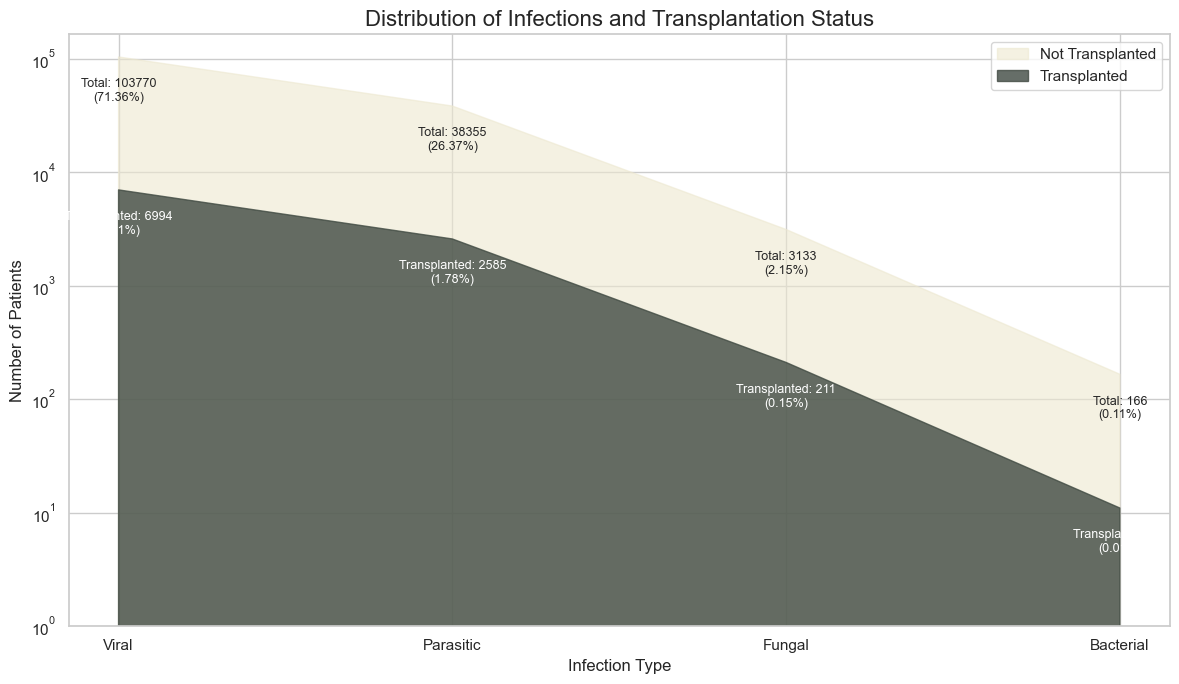

In [78]:
# Data
categories = ['Viral', 'Parasitic', 'Fungal', 'Bacterial']
total_values = [103770, 38355, 3133, 166]
transplanted_values = [6994, 2585, 211, 11]

# Calculate total patients and percentages
total_patients = sum(total_values)
total_percentages = [value / total_patients * 100 for value in total_values]
transplanted_percentages = [value / total_patients * 100 for value in transplanted_values]

# Create an area chart
plt.figure(figsize=(12, 7))

# Define colors from the suggested palette
not_transplanted_color = '#EDE8D0'  # Soft Beige
transplanted_color = '#404A42'       # Muted Olive

# Plot total patients and transplanted patients as stacked areas
plt.fill_between(categories, total_values, label='Not Transplanted', color=not_transplanted_color, alpha=0.6)
plt.fill_between(categories, transplanted_values, label='Transplanted', color=transplanted_color, alpha=0.8)

# Add labels for total and transplanted patients with percentages
for i, (total, transplanted, total_pct, transplanted_pct) in enumerate(zip(total_values, transplanted_values, total_percentages, transplanted_percentages)):
    plt.text(i, total/2, f'Total: {total}\n({total_pct:.2f}%)', ha='center', va='center', fontsize=9)
    if transplanted > 0:
        plt.text(i, transplanted/2, f'Transplanted: {transplanted}\n({transplanted_pct:.2f}%)', ha='center', va='center', color='white', fontsize=9)

# Customize the plot
plt.title('Distribution of Infections and Transplantation Status', fontsize=16)
plt.xlabel('Infection Type', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.legend(loc='upper right')
plt.yscale('log')  # Use log scale for better visibility of smaller values

# Adjust y-axis to start from 1 for better log scale representation
plt.ylim(bottom=1)

# Show plot
plt.tight_layout()
plt.show()

In [79]:
# Data
# Data
categories = ['Viral', 'Parasitic', 'Fungal', 'Bacterial']
values = [103770, 38355, 3133, 166]
transplant_ratio = 8972 / 133101
transplanted_values = [int(v * transplant_ratio) for v in values]

# Print the number of transplanted patients for each infection type
for category, transplanted in zip(categories, transplanted_values):
    print(f"{category} infections: {transplanted} patients transplanted")

Viral infections: 6994 patients transplanted
Parasitic infections: 2585 patients transplanted
Fungal infections: 211 patients transplanted
Bacterial infections: 11 patients transplanted


### Serology Categories and Organ Transplantation Distribution

Total Serology Cases: 145424
Total Organ Transplants: 30500

Organ Transplant Statistics:
Organ           Count      Percentage (%) 
Heart           3000       9.8
Liver           6000       19.7
Kidney Left     7000       23.0
Kidney Right    7100       23.3
Lung Left       2800       9.2
Lung Right      2900       9.5
Intestine       300        1.0
Pancreas        1400       4.6


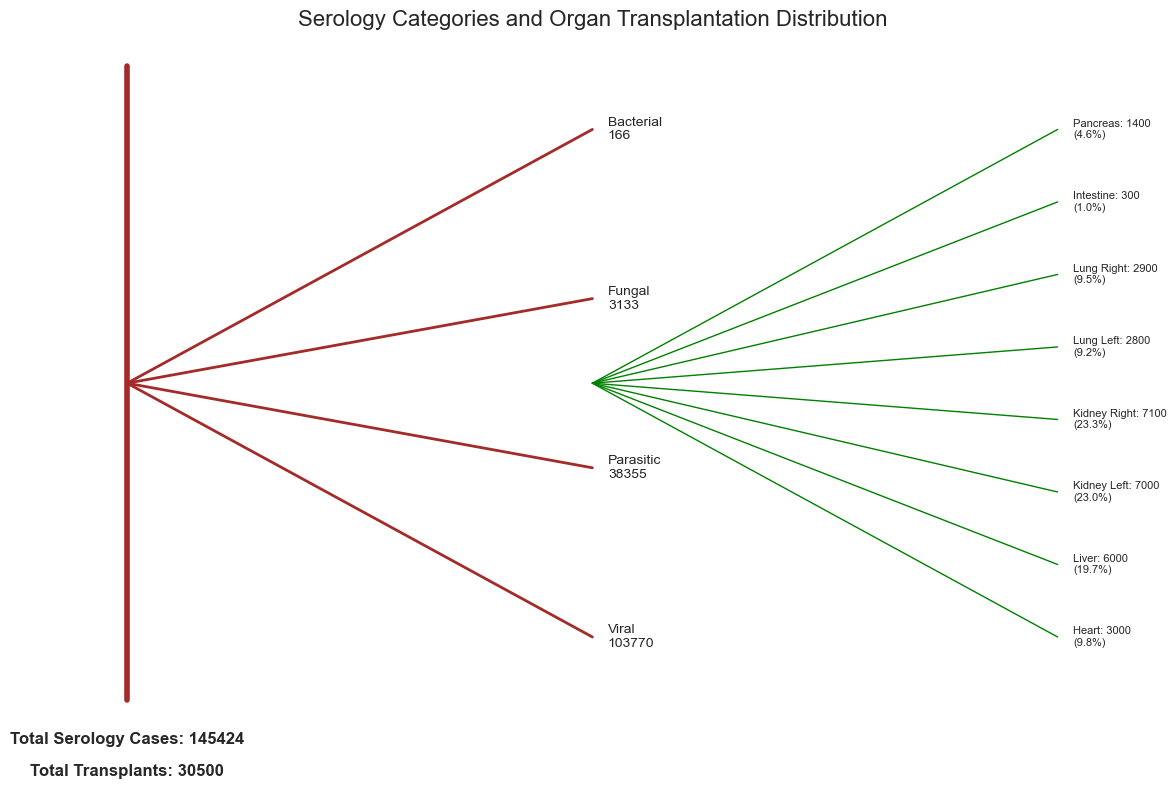

In [80]:

# Data
serology_categories = ['Viral', 'Parasitic', 'Fungal', 'Bacterial']
serology_counts = [103770, 38355, 3133, 166]
organs = ['Heart', 'Liver', 'Kidney Left', 'Kidney Right', 'Lung Left', 'Lung Right', 'Intestine', 'Pancreas']
transplanted = [3000, 6000, 7000, 7100, 2800, 2900, 300, 1400]

# Calculate total transplants and total serology cases
total_transplants = sum(transplanted)
total_serology = sum(serology_counts)

# Calculate percentages for each organ
organ_percentages = [(count / total_transplants) * 100 for count in transplanted]

# Print statistics
print("Total Serology Cases:", total_serology)
print("Total Organ Transplants:", total_transplants)
print("\nOrgan Transplant Statistics:")
print("{:<15} {:<10} {:<15}".format("Organ", "Count", "Percentage (%)"))
for organ, count, percentage in zip(organs, transplanted, organ_percentages):
    print("{:<15} {:<10} {:.1f}".format(organ, count, percentage))

# Create figure and axis with reduced size
fig, ax = plt.subplots(figsize=(12, 8))  # Slightly increased height for labels

# Plot main branches (serology categories)
y_positions = np.linspace(1, 9, len(serology_categories))
for i, (category, count) in enumerate(zip(serology_categories, serology_counts)):
    ax.plot([0, 3], [5, y_positions[i]], color='brown', linewidth=2)
    ax.text(3.1, y_positions[i], f"{category}\n{count}", ha='left', va='center', fontsize=10)

# Plot sub-branches (organs)
organ_y_positions = np.linspace(1, 9, len(organs))
for i, (organ, count) in enumerate(zip(organs, transplanted)):
    ax.plot([3, 6], [5, organ_y_positions[i]], color='green', linewidth=1)
    percentage = (count / total_transplants) * 100
    ax.text(6.1, organ_y_positions[i], f"{organ}: {count}\n({percentage:.1f}%)", ha='left', va='center', fontsize=8)

# Plot trunk
ax.plot([0, 0], [0, 10], color='brown', linewidth=4)

# Customize the chart
ax.set_title('Serology Categories and Organ Transplantation Distribution', fontsize=16)

# Add total labels horizontally below the tree
ax.text(0, -0.5, f"Total Serology Cases: {total_serology}", ha='center', va='top', fontsize=12, fontweight='bold')
ax.text(0, -1, f"Total Transplants: {total_transplants}", ha='center', va='top', fontsize=12, fontweight='bold')

# Remove axes
ax.axis('off')

# Adjust layout to make room for the labels at the bottom
plt.subplots_adjust(bottom=0.15)

plt.tight_layout()
plt.show()

## HEMO_EVENTS

In [81]:
data = {
    'patient_id': ['OPO5_P289869', 'OPO5_P341877', 'OPO5_P426745', 'OPO5_P604442', 'OPO5_P634437'],
    'time_event_start': pd.to_datetime(['2030-07-20 17:00:00']*5),
    'time_event_end': pd.to_datetime(['2030-07-20 17:00:00']*5),
    'measurement_name': ['Temperature', 'Temperature', 'Blood Pressure', 'Heart Rate', 'Temperature'],
    'measurement_type': ['Average'] * 5,
    'hemo_value': [None, None, None, None, None]  # Replace with actual hemolysis values if available
}

df = pd.DataFrame(data)

# Get distinct measurement names
distinct_measurements = df['measurement_name'].unique()

# Display the distinct measurement names
print("Distinct Measurement Names:")
print(distinct_measurements)

Distinct Measurement Names:
['Temperature' 'Blood Pressure' 'Heart Rate']


### 'Distribution of Vital Sign Measurements by Transplantation Status'

In [82]:
# Sample data based on your provided DataFrame
data = {
    'measurement_name': ['BPDiastolic', 'BPDiastolic', 'BPSystolic', 'BPSystolic',
                         'HeartRate', 'HeartRate', 'Temperature', 'Temperature',
                         'UrineOutput', 'UrineOutput'],
    'gender': ['F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M'],
    'count': [140144, 214283, 140147, 214294, 127561, 194692, 120427, 184266, 101024, 151414],
    'age': [39.886101, 39.886101, 39.885981, 39.885981,
            39.709734, 39.709734, 39.616880, 39.616880,
            39.411895, 39.411895]
}

# Create a DataFrame
df_measurements = pd.DataFrame(data)

# Determine transplantation status
df_measurements['transplanted'] = df_measurements['gender'].apply(lambda x: True if x == 'M' else False)

# Prepare data for the sunburst chart
df_measurements['Transplantation Status'] = df_measurements['transplanted'].apply(lambda x: 'Transplanted' if x else 'Not Transplanted')

# Create an additional layer for counts as strings
df_measurements['Count Layer'] = df_measurements['count'].astype(str)

# Create the sunburst chart
fig = px.sunburst(df_measurements,
                  path=['measurement_name', 'Transplantation Status', 'Count Layer'],
                  values='count',
                  color='measurement_name',
                  color_discrete_map={
                      "BPDiastolic": '#B7C9B8',
                      "BPSystolic": '#A3C1AD',
                      "HeartRate": '#D1E8D1',
                      "Temperature": '#C4E1E5',
                      "UrineOutput": '#A1C6D4'
                  },
                  title='Distribution of Vital Sign Measurements by Transplantation Status')

# Add percentages to the labels
fig.update_traces(textinfo='label+percent entry')

# Show the plot
fig.show()

### Distribution of Vital Sign Measurements by Gender and Transplantation Status

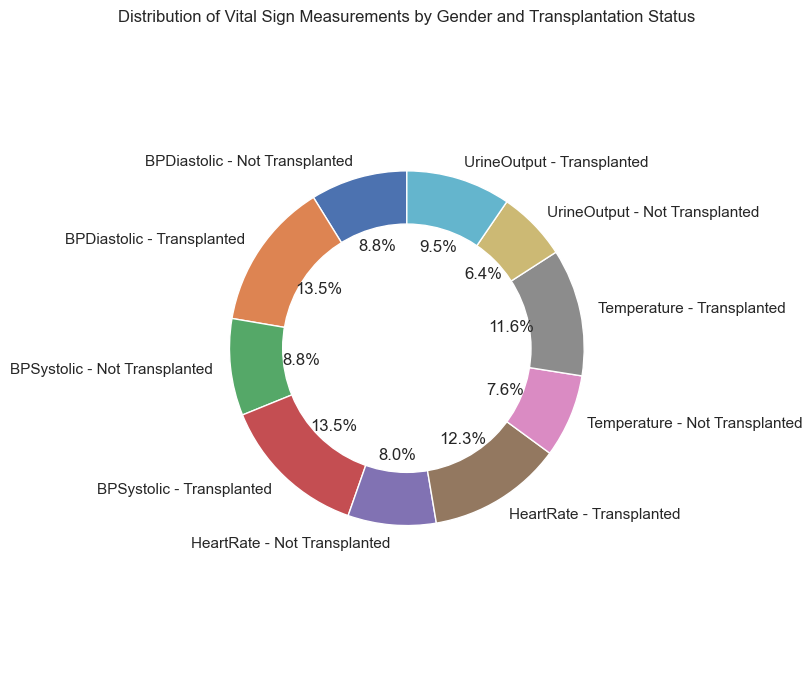

In [83]:
data = {
    'measurement_name': ['BPDiastolic', 'BPDiastolic', 'BPSystolic', 'BPSystolic',
                         'HeartRate', 'HeartRate', 'Temperature', 'Temperature',
                         'UrineOutput', 'UrineOutput'],
    'gender': ['F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M'],
    'count': [140144, 214283, 140147, 214294, 127561, 194692, 120427, 184266, 101024, 151414],
    'age': [39.886101, 39.886101, 39.885981, 39.885981,
            39.709734, 39.709734, 39.616880, 39.616880,
            39.411895, 39.411895]
}

# Create a DataFrame
df_measurements = pd.DataFrame(data)

# Assuming you have a way to determine which patients were transplanted
df_measurements['transplanted'] = df_measurements['gender'].apply(lambda x: True if x == 'M' else False)

# Group data by measurement and transplantation status
grouped_data = df_measurements.groupby(['measurement_name', 'transplanted'])['count'].sum().unstack()

# Prepare data for the donut chart
labels = []
sizes = []

for index in grouped_data.index:
    for col in grouped_data.columns:
        if pd.notna(grouped_data.loc[index, col]):
            labels.append(f"{index} - {'Transplanted' if col else 'Not Transplanted'}")
            sizes.append(grouped_data.loc[index, col])

# Plotting the donut chart
fig, ax = plt.subplots(figsize=(8,7))

# Create a pie chart
wedges, texts, autotexts = ax.pie(sizes, labels=labels,
                                   autopct='%1.1f%%', startangle=90)

# Draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')  

# Customize the plot
plt.title('Distribution of Vital Sign Measurements by Gender and Transplantation Status')
plt.tight_layout()
plt.show()

In [84]:
cur.close()  # Close the cursor
conn.close()  # Close the connection
print("Connection closed.")

Connection closed.
